In [1]:
import numpy as np
import sys
import matplotlib
sys.path.append('../')

from visualiserisk import *
from qslamdesignparams import GRIDDICT

#### Parameter Regimes

The set of parameters are given in the dictionary format, LOOPS_DICT, and used for analysis via ParamUpdater. 

In [2]:
meta_truth_floor_scan = [0.2, 0.4, 0.6, 0.8, 1.0]

meta_max_iter_scan = [ 5, 10, 15, 20, 25, 50, 75, 100, 125, 250]

noiseclasses = ['noiseless'] + ['alwaysdark', 'spnoise']*4
noisestrengths = [0.0, 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.5, 0.5]*2 # shouldnt be a 2 but hopefully doesnt matter
meta_noisevar_scan = zip(noiseclasses, noisestrengths)

lowscan = np.asarray([0.2]*5)*np.pi
highscan = np.asarray([0.2, 0.4, 0.6, 0.8, 1.0])*np.pi
truth_step_scan = zip(lowscan, highscan)


lambda1 = [0.99, 0.956, 0.922, 0.888, 0.854, 0.820, 0.786, 0.752, 0.718, 0.684, 0.65]
lambda2 = [0.977, 0.9752, 0.9734, 0.9716, 0.9698, 0.968, 0.9662, 0.9644, 0.9626, 0.9608, 0.959]
lambda_scan = zip(lambda1, lambda2)
msmt_per_qubit_scan = [1, 2, 4, 5, 6, 8, 10, 15, 20, 25, 50]

msmt_per_qubit_scan = [1, 2, 4, 5, 6, 8, 10, 15, 20, 25, 50]


LOOPS_DICT = {"meta_truth_floor_scan": meta_truth_floor_scan,
              "meta_max_iter_scan":meta_max_iter_scan, 
              "meta_noisevar_scan": meta_noisevar_scan,
              "truth_step_scan": truth_step_scan,
              "lambda_scan":lambda_scan,
              "msmt_per_qubit_scan": msmt_per_qubit_scan}

ParamUpdater = DataCube(LOOPS_DICT)


#### Get data filenames

In [3]:
weightratioslist = []
msmtperqubitlist = []

for prefix in ['NSL_tfloor', 'NSL_theight']:
    for idx_noise_var in range(len(ParamUpdater.meta_noisevar_scan)):
        for idx_var_dict in range(2):

            regime_ID = prefix + '_n_' + str(idx_noise_var) +'_vset_' + str(idx_var_dict)
            datafile = './data/'+'RISK_' + regime_ID +'.npz'
            
            if idx_var_dict == 0:
                weightratioslist.append(datafile) 
            elif idx_var_dict ==1 :
                msmtperqubitlist.append(datafile)

# Data variables
max_msmtvar = len(ParamUpdater.meta_max_iter_scan)
max_var = max(len(ParamUpdater.lambda_scan), len(ParamUpdater.msmt_per_qubit_scan))

#### Graph code

In [4]:
# Graphing variables
colors = ['darkorange', 'slateblue', 'firebrick', 'indigo']
truthmarkers = ['o--']*4 #, 'x', 'o--', 'v'

In [5]:
def plot_iter_v_variable(ParamUpdater, full_data_matrix, truthname='', variablename='# /iter'):
    
    var_param = np.asarray(ParamUpdater.msmt_per_qubit_scan)
    max_truth = len(ParamUpdater.meta_truth_floor_scan)
    max_var = len(var_param)
    
    for idx_prevar in range(0, max_truth, 1):
    
        fig = plt.figure(figsize=(cm2inch(40), cm2inch(20)))

        print "Truth "+truthname+" | idx_prevar: %s " %(idx_prevar)

        for idx_var_ in range(max_var):

            # -----------------------------------------------------------------------------------------
            ax = fig.add_subplot(4, max_var, idx_var_+ 1)

            ax.set_title(variablename+' %s'%(var_param[idx_var_]))
            ax.set_ylim([0,1])
            ax.set_xscale('log')

            ax.plot(ParamUpdater.meta_max_iter_scan, full_data_matrix[idx_prevar, :, idx_var_, 0, 2], 'o',  
                        alpha = 0.5,
                        color='slateblue',
                        ms=3,
                        lw=1.)

            if idx_var_== 0:
                ax.set_ylabel('RMS')
                ax.legend(loc=0)
            # -----------------------------------------------------------------------------------------
            ax = fig.add_subplot(4, max_var, idx_var_+ 1)

            ax.set_xscale('log')
            ax.set_ylim([0,1])

            ax.plot(ParamUpdater.meta_max_iter_scan, full_data_matrix[idx_prevar, :, idx_var_, 1, 2],  'o',  
                        alpha = 0.5,
                        color='darkorange',
                        ms=3,
                        lw=1.)

            if idx_var_== 0:
                ax.set_ylabel('RMS')
                ax.legend(loc=0)
            # -----------------------------------------------------------------------------------------
            ax = fig.add_subplot(4, max_var, max_var + idx_var_+ 1)

            ax.set_xscale('log')
            ax.set_ylim([0,1])

            ax.plot(ParamUpdater.meta_max_iter_scan, full_data_matrix[idx_prevar, :, idx_var_, 0, 3], 'o', 
                            alpha = 0.5,
                            color='indigo',
                            ms=3,
                            lw=1.)

            if idx_var_== 0:
                ax.set_ylabel('SSIM')
                ax.legend(loc=0)

            # -----------------------------------------------------------------------------------------
            ax = fig.add_subplot(4, max_var, max_var + idx_var_+ 1)
            ax.set_ylim([0,1])
            ax.set_xscale('log')
    #         ax.set_yscale('log')

        #     for idx_prevar in range(0, max_idx_prevar_zsl-1, 1): 
            ax.plot(ParamUpdater.meta_max_iter_scan, full_data_matrix[idx_prevar, :, idx_var_, 1, 3], 'o', 
                        alpha = 0.5,
                        color='firebrick',
                        ms=3,
                        lw=1.)

            if idx_var_== 0:
                ax.set_ylabel('SSIM')
                ax.set_xlabel('Iterations (num)')

        plt.show()

In [6]:
def plot_variable_v_iter(ParamUpdater, full_data_matrix, truthname='', variablename='WR'):
    
    var_param = ParamUpdater.meta_max_iter_scan
    max_truth = len(ParamUpdater.meta_truth_floor_scan)
    max_msmt = len(ParamUpdater.meta_max_iter_scan)
    xaxis = np.linspace(0, 1, len(ParamUpdater.lambda_scan))
    
    
    for idx_prevar in range(0, max_truth, 1):
    
        fig = plt.figure(figsize=(cm2inch(40), cm2inch(20)))

        print "Truth "+truthname+" | idx_prevar: %s " %(idx_prevar)

        for idx_msmt in range(max_msmt):

            # -----------------------------------------------------------------------------------------
            ax = fig.add_subplot(4, max_msmt, idx_msmt + 1)

            ax.set_title('iter %s'%(var_param[idx_msmt]))
            ax.set_ylim([0,1])
            

            ax.plot(xaxis, full_data_matrix[idx_prevar, idx_msmt, :, 0, 2], 'o',  
                        alpha = 0.5,
                        color='slateblue',
                        ms=3,
                        lw=1.)

            if idx_msmt == 0:
                ax.set_ylabel('RMS')
                ax.legend(loc=0)
            # -----------------------------------------------------------------------------------------
            ax = fig.add_subplot(4, max_msmt, idx_msmt + 1)

            
            ax.set_ylim([0,1])

            ax.plot(xaxis, full_data_matrix[idx_prevar, idx_msmt, :, 1, 2],  'o',  
                        alpha = 0.5,
                        color='darkorange',
                        ms=3,
                        lw=1.)

            if idx_msmt == 0:
                ax.set_ylabel('RMS')
                ax.legend(loc=0)
            # -----------------------------------------------------------------------------------------
            ax = fig.add_subplot(4, max_msmt, max_msmt + idx_msmt + 1)

            
            ax.set_ylim([0,1])

            ax.plot(xaxis, full_data_matrix[idx_prevar, idx_msmt, :, 0, 3], 'o', 
                            alpha = 0.5,
                            color='indigo',
                            ms=3,
                            lw=1.)

            if idx_msmt == 0:
                ax.set_ylabel('SSIM')
                ax.legend(loc=0)

            # -----------------------------------------------------------------------------------------
            ax = fig.add_subplot(4, max_msmt, max_msmt + idx_msmt + 1)
            ax.set_ylim([0,1])
            

            ax.plot(xaxis, full_data_matrix[idx_prevar, idx_msmt, :, 1, 3], 'o', 
                        alpha = 0.5,
                        color='firebrick',
                        ms=3,
                        lw=1.)

            if idx_msmt == 0:
                ax.set_ylabel('SSIM')
                ax.set_xlabel( variablename + ' (a.u.)')

        plt.show()

In [7]:
def plot_variable_v_noise(ParamUpdater, filenamelist, noise_idx_list,
                          set_idx_msmt=6, set_idx_prevar=2,
                          truthname='', variablename='WR'):
    
    
    data_holder = []
    
    xaxis = np.linspace(0, 1, len(ParamUpdater.lambda_scan))
    fig = plt.figure(figsize=(cm2inch(40), cm2inch(20)))
    
    for idx_noise in range(len(noise_idx_list)):
        
        filename = filenamelist[noise_idx_list[idx_noise]]
        full_data_matrix = np.load(filename)["full_data_matrix"]
        
        
        # -----------------------------------------------------------------------------------------
        ax = fig.add_subplot(4, len(noise_idx_list), idx_noise + 1)
        ax.set_title(ParamUpdater.meta_noisevar_scan[noise_idx_list[idx_noise]])
        ax.set_ylim([0,1])


        ax.plot(xaxis, full_data_matrix[set_idx_prevar, set_idx_msmt, :, 0, 2], 'o',  
                    alpha = 0.5,
                    color='slateblue',
                    ms=3,
                    lw=1.)

        if idx_noise == 0:
            ax.set_ylabel('RMS')
            ax.legend(loc=0)
        # -----------------------------------------------------------------------------------------
        ax = fig.add_subplot(4, len(noise_idx_list), idx_noise + 1)


        ax.set_ylim([0,1])

        ax.plot(xaxis, full_data_matrix[set_idx_prevar, set_idx_msmt, :, 1, 2],  'o',  
                    alpha = 0.5,
                    color='darkorange',
                    ms=3,
                    lw=1.)

        if idx_noise == 0:
            ax.set_ylabel('RMS')
            ax.legend(loc=0)
        # -----------------------------------------------------------------------------------------
        ax = fig.add_subplot(4, len(noise_idx_list), len(noise_idx_list) + idx_noise + 1)


        ax.set_ylim([0,1])

        ax.plot(xaxis, full_data_matrix[set_idx_prevar, set_idx_msmt, :, 0, 3], 'o', 
                        alpha = 0.5,
                        color='indigo',
                        ms=3,
                        lw=1.)

        if idx_noise == 0:
            ax.set_ylabel('SSIM')
            ax.legend(loc=0)

        # -----------------------------------------------------------------------------------------
        ax = fig.add_subplot(4, len(noise_idx_list), len(noise_idx_list) + idx_noise + 1)
        ax.set_ylim([0,1])


        ax.plot(xaxis, full_data_matrix[set_idx_prevar, set_idx_msmt, :, 1, 3], 'o', 
                    alpha = 0.5,
                    color='firebrick',
                    ms=3,
                    lw=1.)

        if idx_noise == 0:
            ax.set_ylabel('SSIM')
            ax.set_xlabel( variablename + ' (a.u.)')

    plt.show()

## Linearised measurement model: msmts  per iterations 
** as a function of truth type, noise type and total iterations **

----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_0_vset_1.npz
('noiseless', 0.0)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


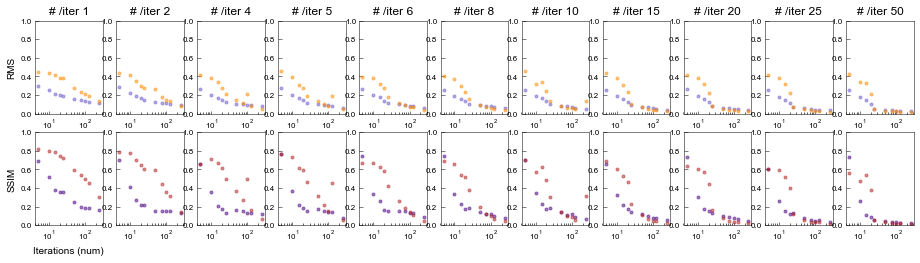

Truth NSL_tfloor | idx_prevar: 1 


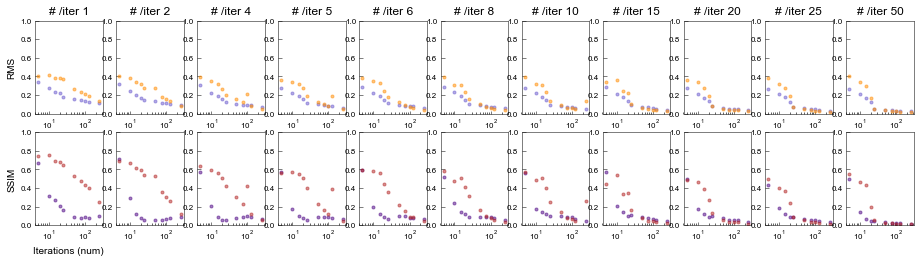

Truth NSL_tfloor | idx_prevar: 2 


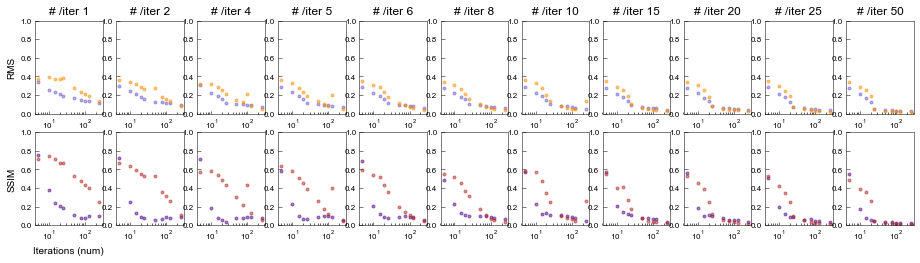

Truth NSL_tfloor | idx_prevar: 3 


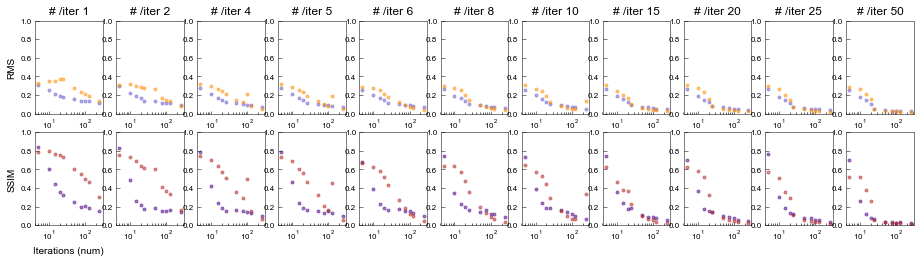

Truth NSL_tfloor | idx_prevar: 4 


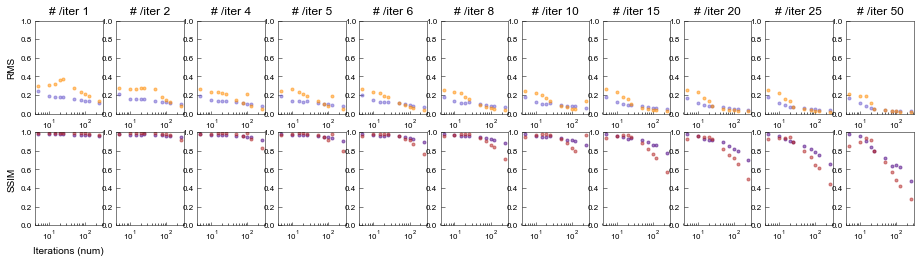



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_1_vset_1.npz
('alwaysdark', 0.1)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


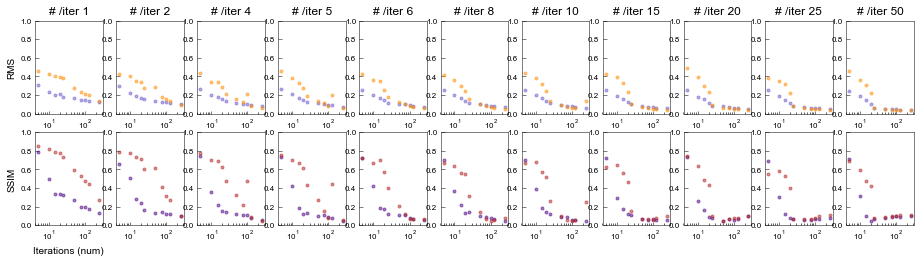

Truth NSL_tfloor | idx_prevar: 1 


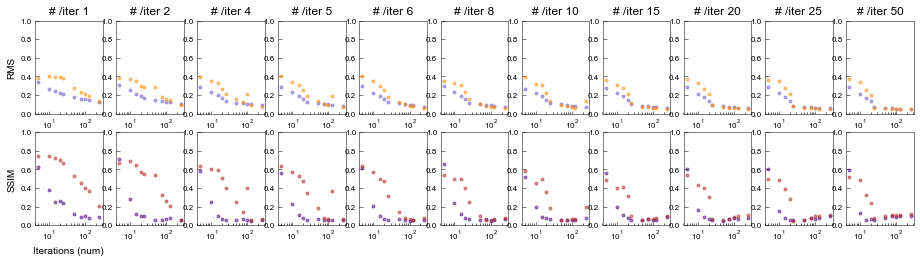

Truth NSL_tfloor | idx_prevar: 2 


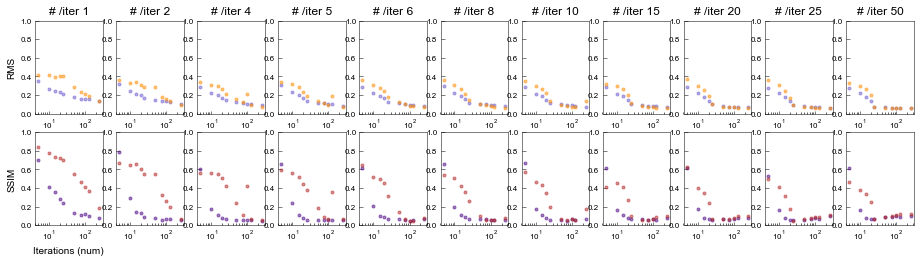

Truth NSL_tfloor | idx_prevar: 3 


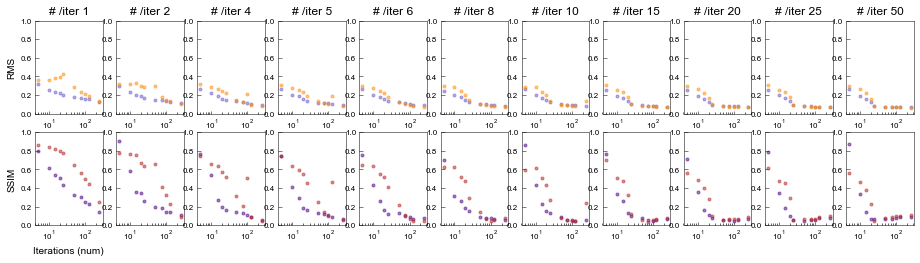

Truth NSL_tfloor | idx_prevar: 4 


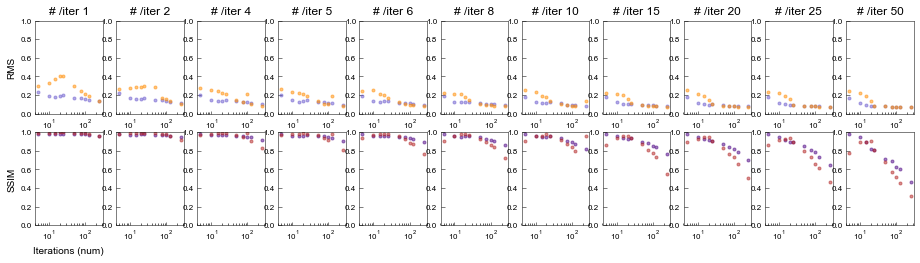



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_2_vset_1.npz
('spnoise', 0.1)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


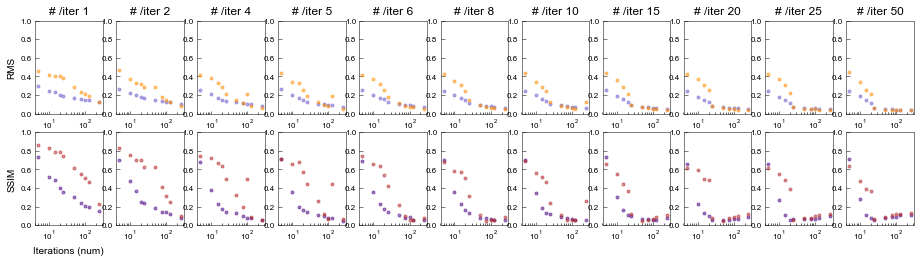

Truth NSL_tfloor | idx_prevar: 1 


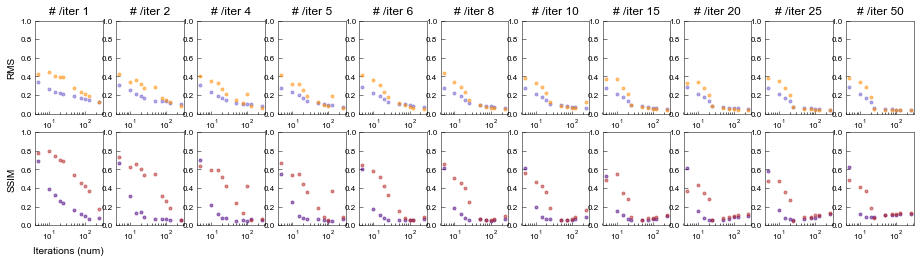

Truth NSL_tfloor | idx_prevar: 2 


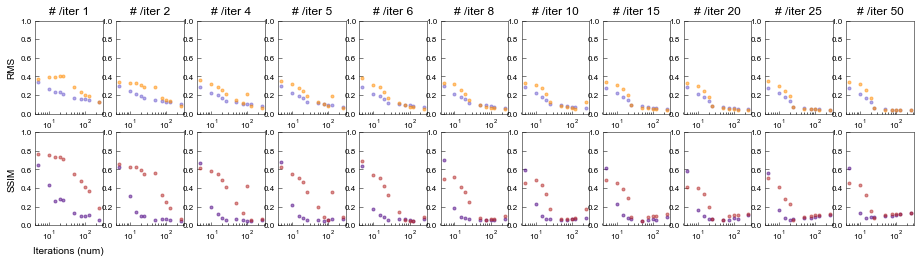

Truth NSL_tfloor | idx_prevar: 3 


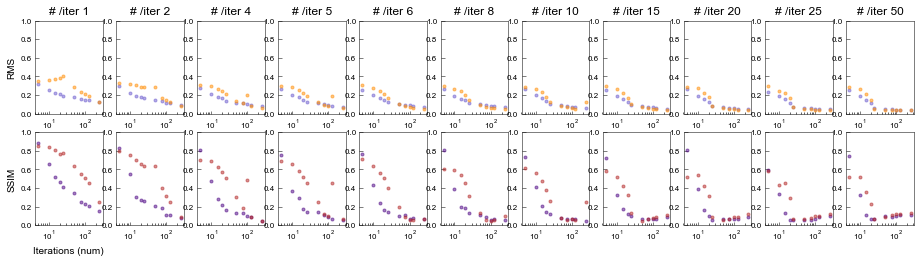

Truth NSL_tfloor | idx_prevar: 4 


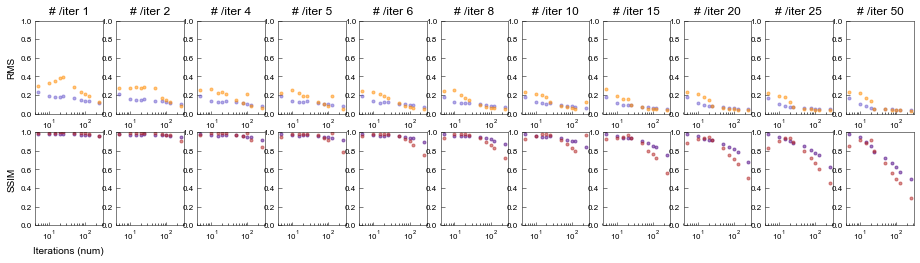



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_3_vset_1.npz
('alwaysdark', 0.2)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


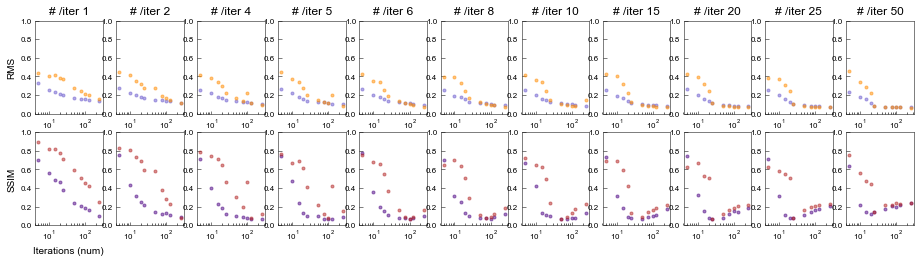

Truth NSL_tfloor | idx_prevar: 1 


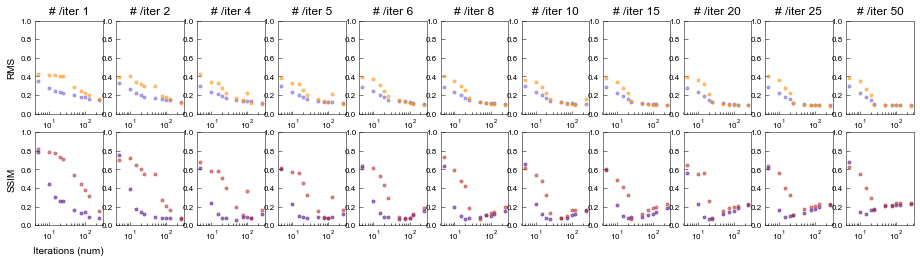

Truth NSL_tfloor | idx_prevar: 2 


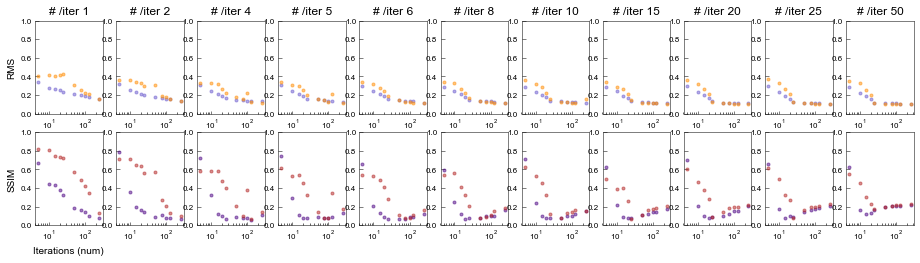

Truth NSL_tfloor | idx_prevar: 3 


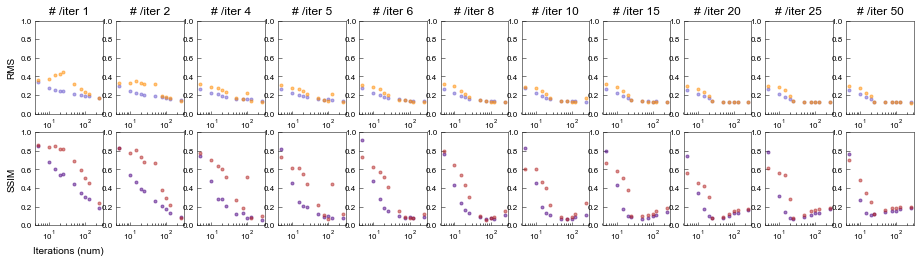

Truth NSL_tfloor | idx_prevar: 4 


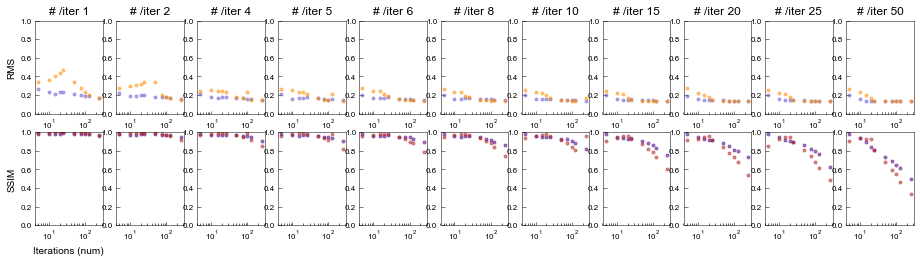



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_4_vset_1.npz
('spnoise', 0.2)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


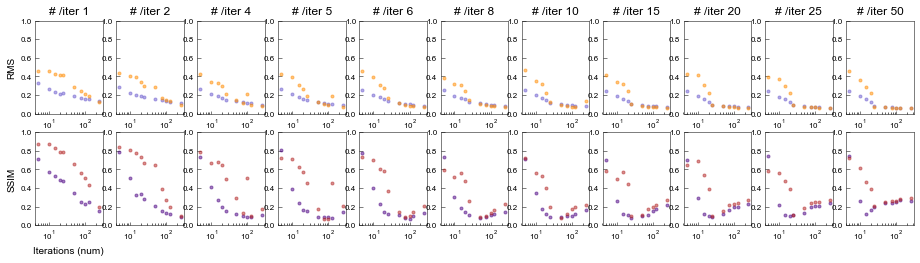

Truth NSL_tfloor | idx_prevar: 1 


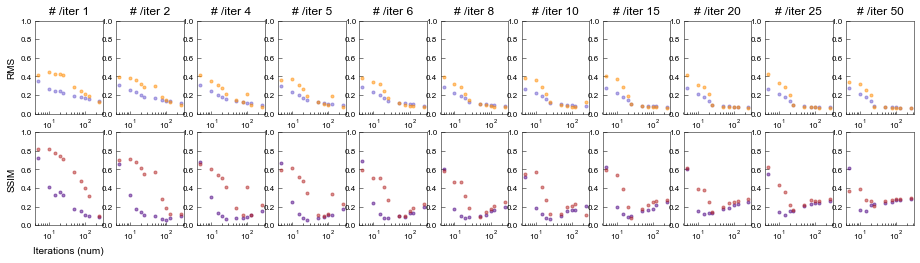

Truth NSL_tfloor | idx_prevar: 2 


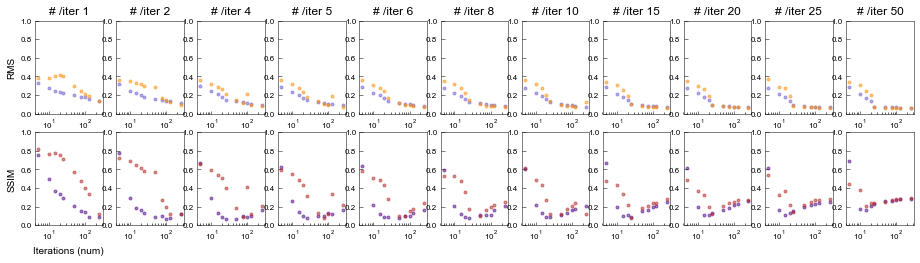

Truth NSL_tfloor | idx_prevar: 3 


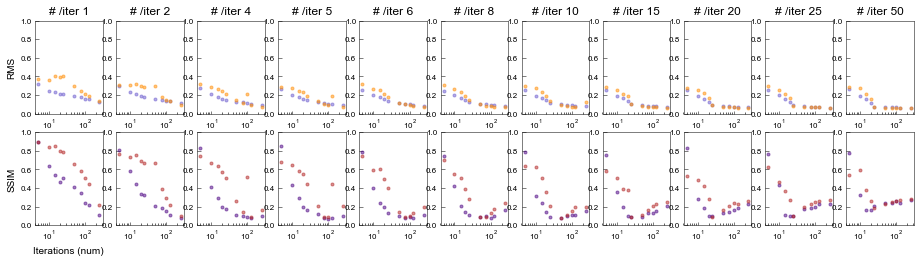

Truth NSL_tfloor | idx_prevar: 4 


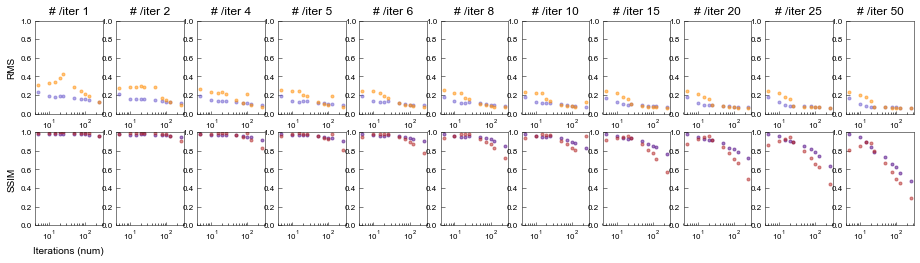



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_5_vset_1.npz
('alwaysdark', 0.3)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


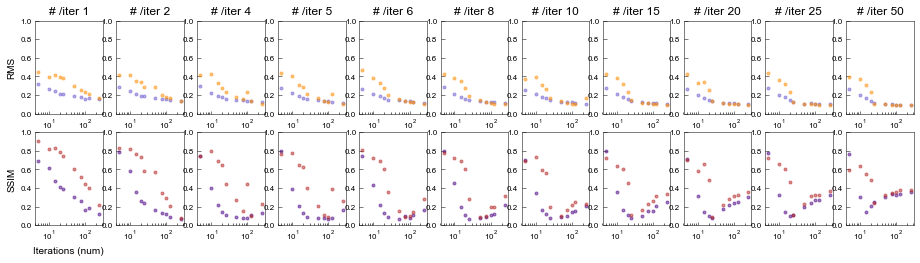

Truth NSL_tfloor | idx_prevar: 1 


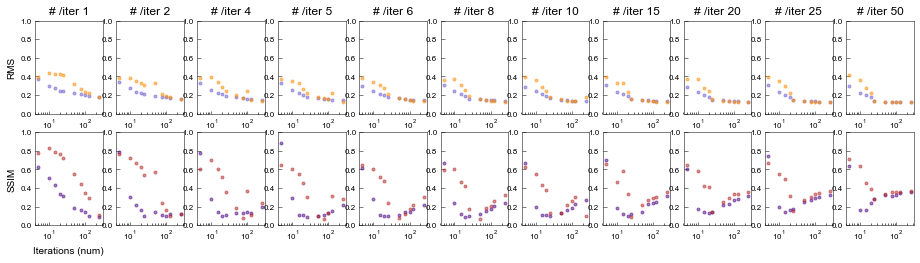

Truth NSL_tfloor | idx_prevar: 2 


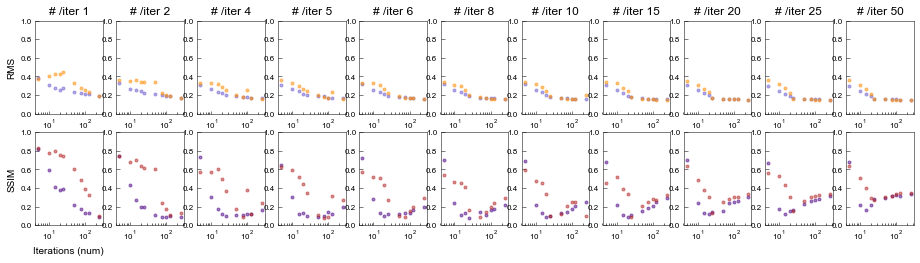

Truth NSL_tfloor | idx_prevar: 3 


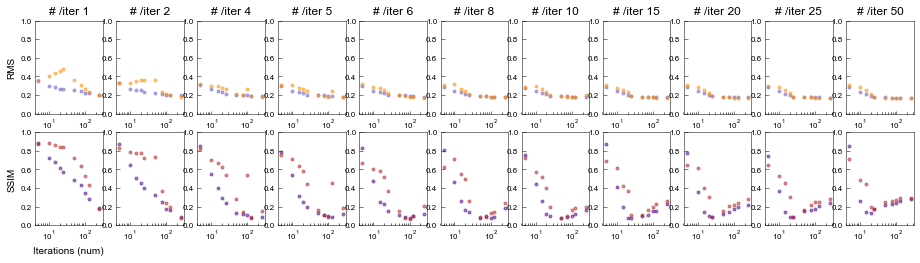

Truth NSL_tfloor | idx_prevar: 4 


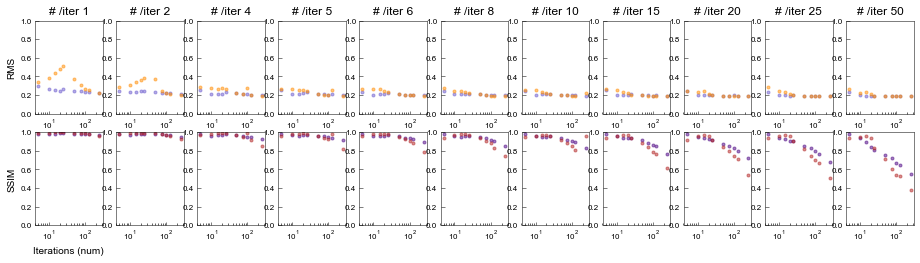



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_6_vset_1.npz
('spnoise', 0.3)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


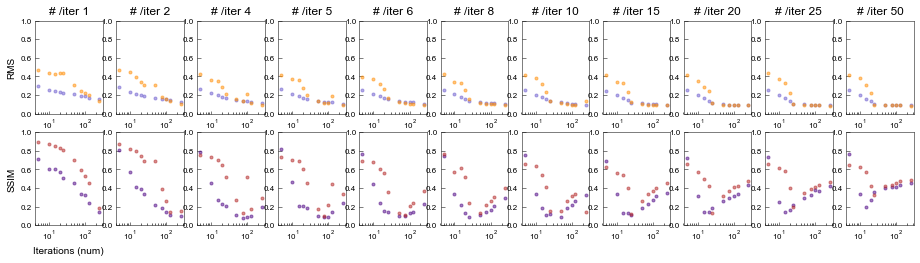

Truth NSL_tfloor | idx_prevar: 1 


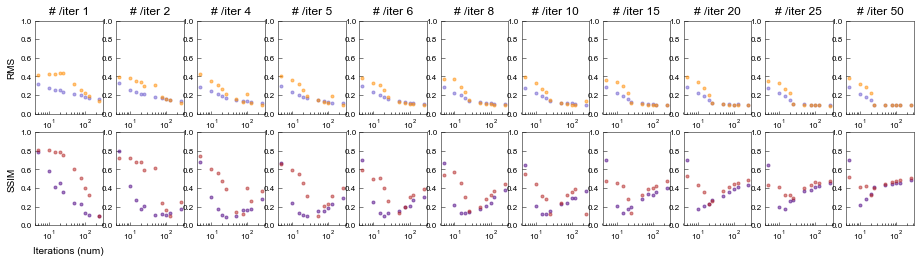

Truth NSL_tfloor | idx_prevar: 2 


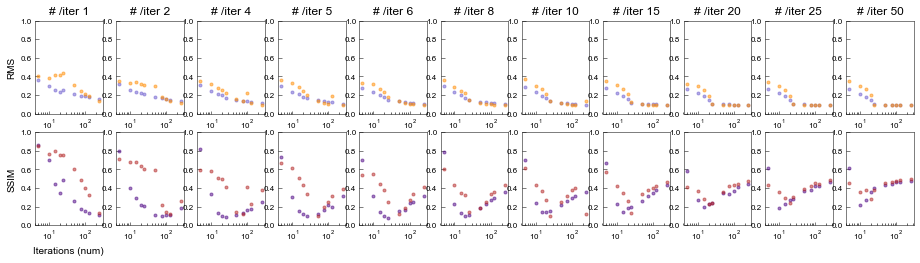

Truth NSL_tfloor | idx_prevar: 3 


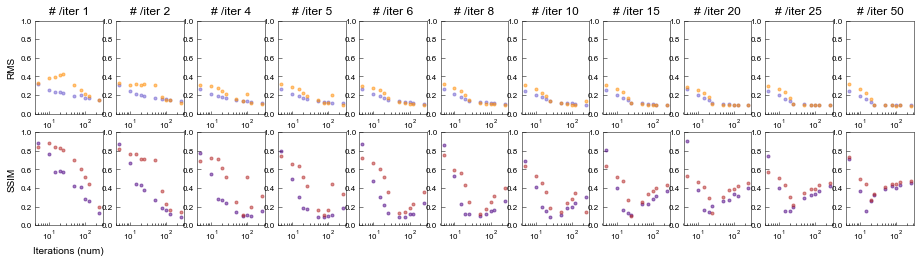

Truth NSL_tfloor | idx_prevar: 4 


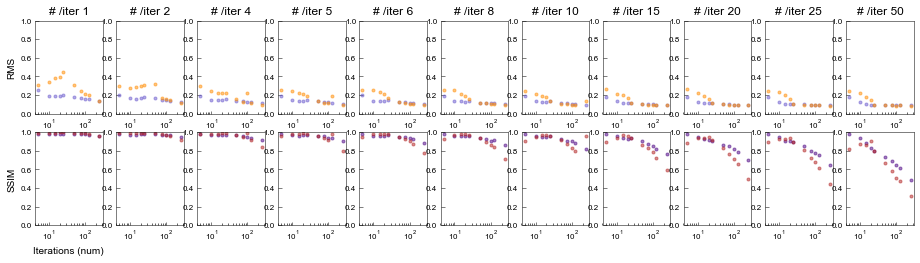



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_7_vset_1.npz
('alwaysdark', 0.5)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


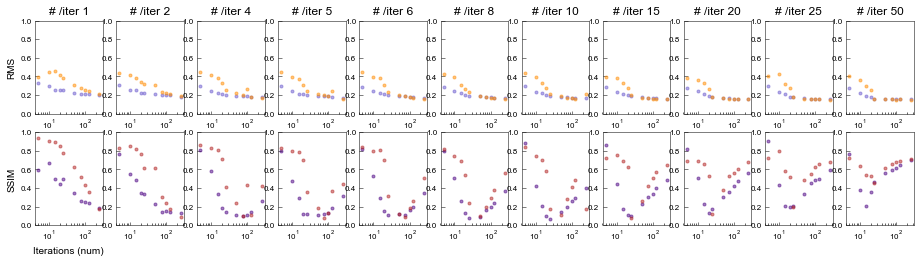

Truth NSL_tfloor | idx_prevar: 1 


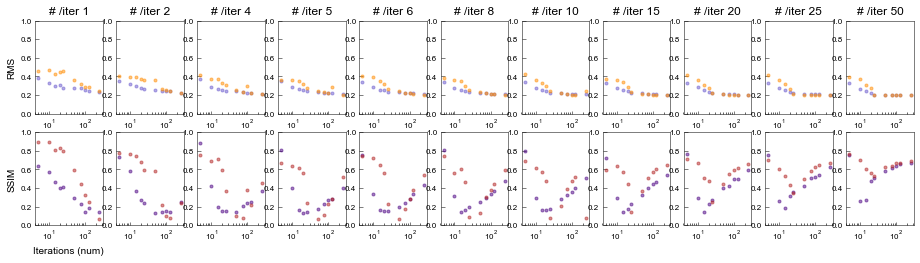

Truth NSL_tfloor | idx_prevar: 2 


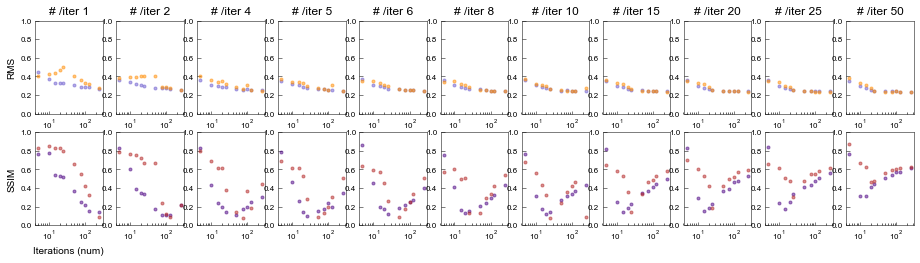

Truth NSL_tfloor | idx_prevar: 3 


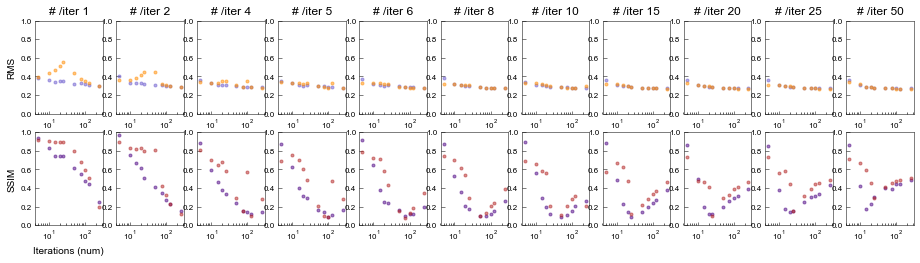

Truth NSL_tfloor | idx_prevar: 4 


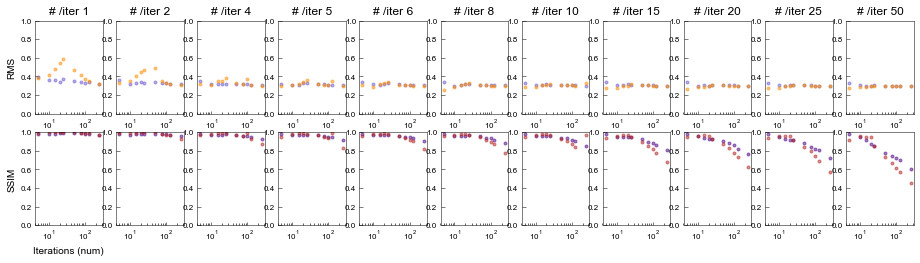



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_8_vset_1.npz
('spnoise', 0.5)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


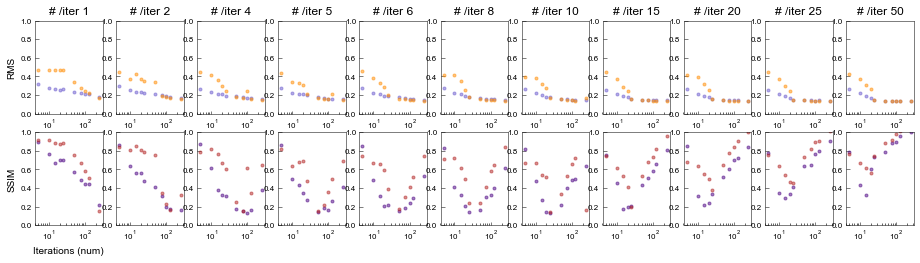

Truth NSL_tfloor | idx_prevar: 1 


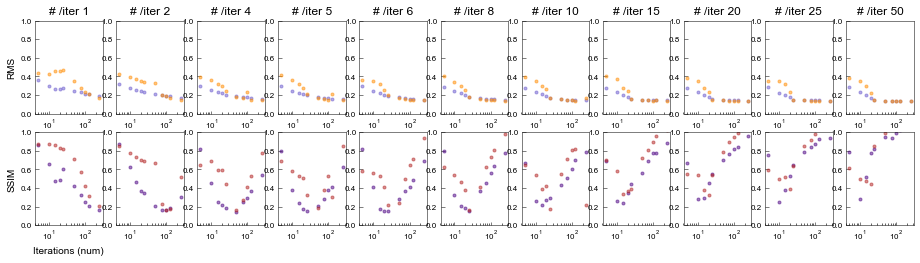

Truth NSL_tfloor | idx_prevar: 2 


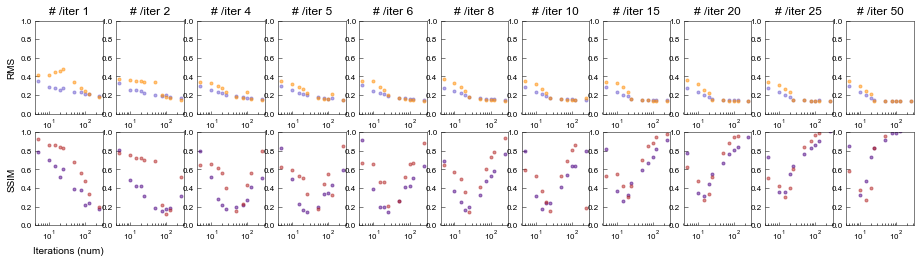

Truth NSL_tfloor | idx_prevar: 3 


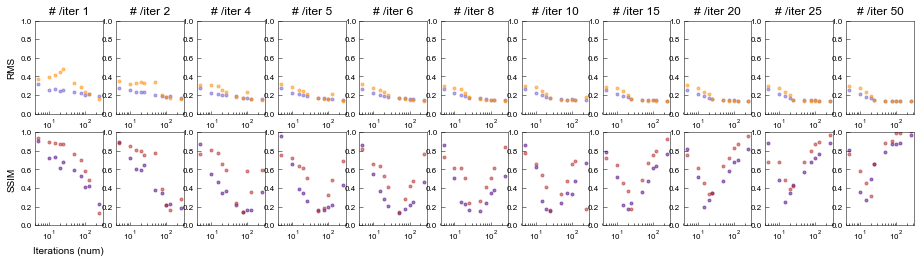

Truth NSL_tfloor | idx_prevar: 4 


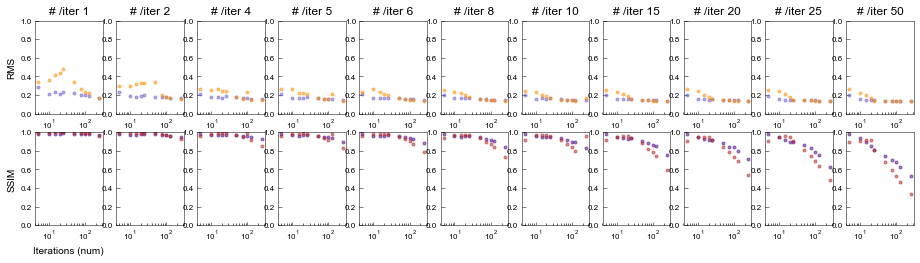



----------------------------------------------------------------
./data/RISK_NSL_theight_n_0_vset_1.npz
('noiseless', 0.0)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


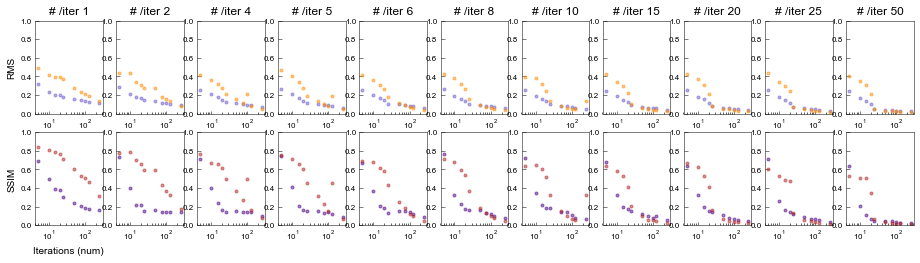

Truth NSL_theight | idx_prevar: 1 


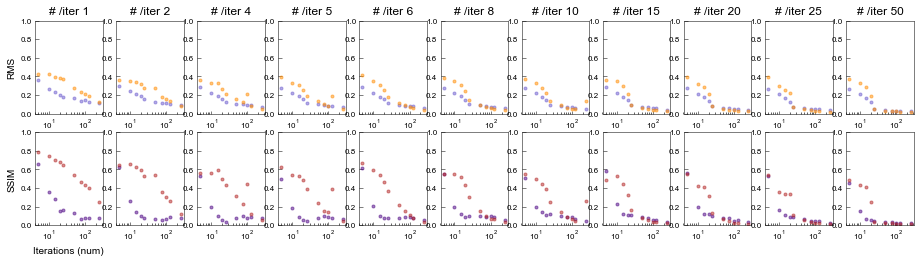

Truth NSL_theight | idx_prevar: 2 


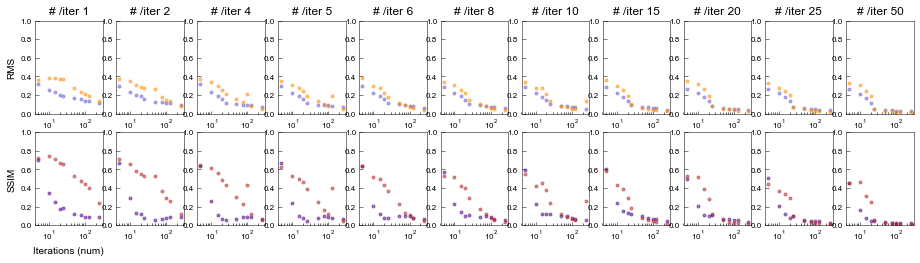

Truth NSL_theight | idx_prevar: 3 


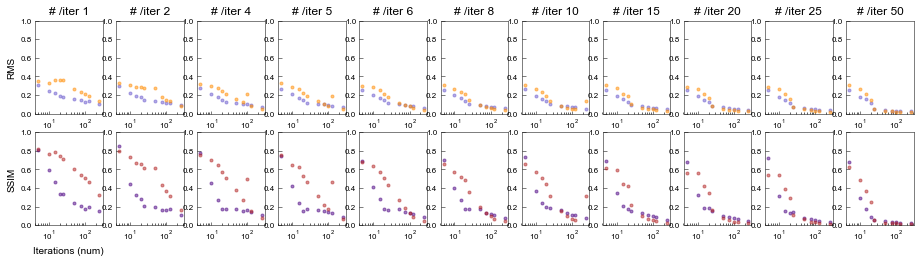

Truth NSL_theight | idx_prevar: 4 


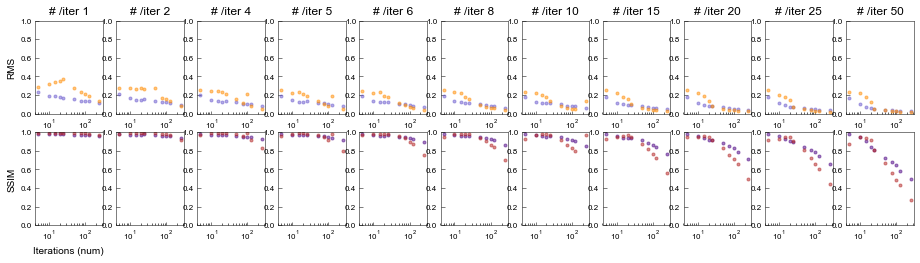



----------------------------------------------------------------
./data/RISK_NSL_theight_n_1_vset_1.npz
('alwaysdark', 0.1)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


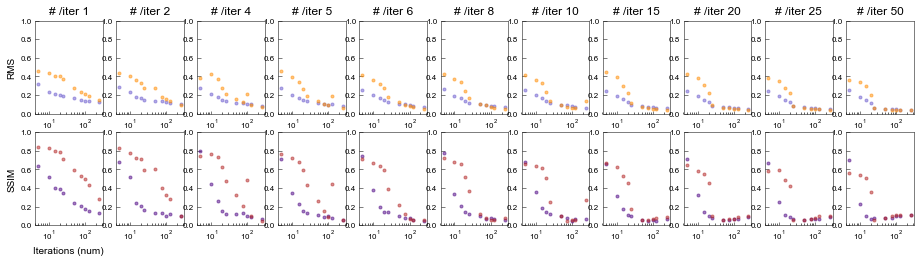

Truth NSL_theight | idx_prevar: 1 


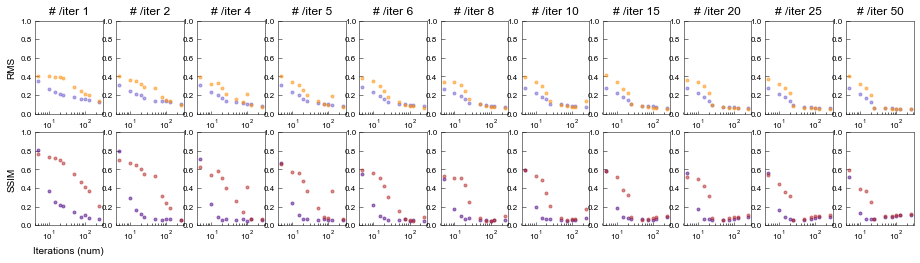

Truth NSL_theight | idx_prevar: 2 


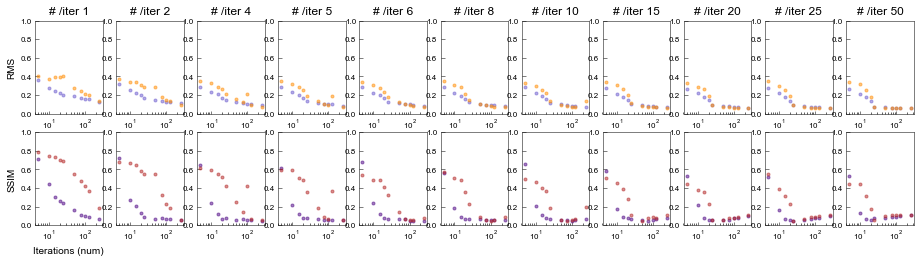

Truth NSL_theight | idx_prevar: 3 


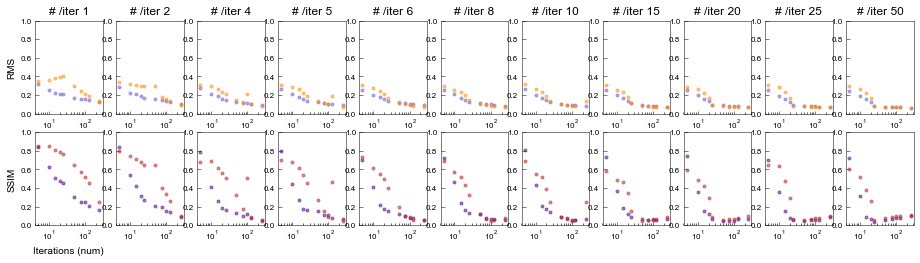

Truth NSL_theight | idx_prevar: 4 


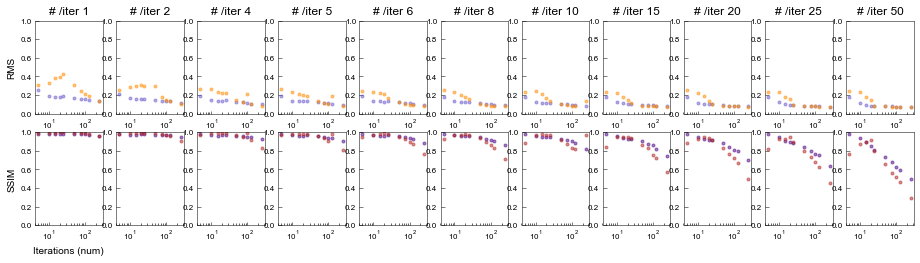



----------------------------------------------------------------
./data/RISK_NSL_theight_n_2_vset_1.npz
('spnoise', 0.1)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


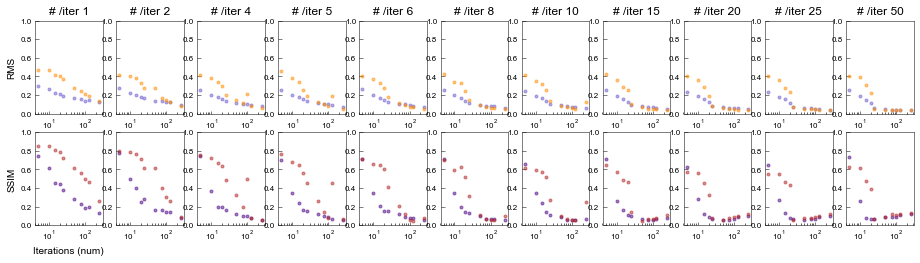

Truth NSL_theight | idx_prevar: 1 


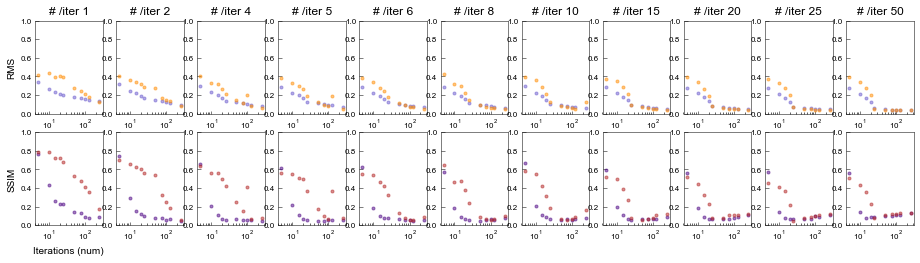

Truth NSL_theight | idx_prevar: 2 


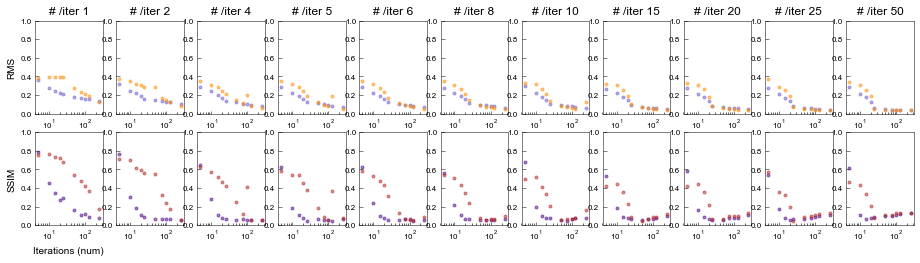

Truth NSL_theight | idx_prevar: 3 


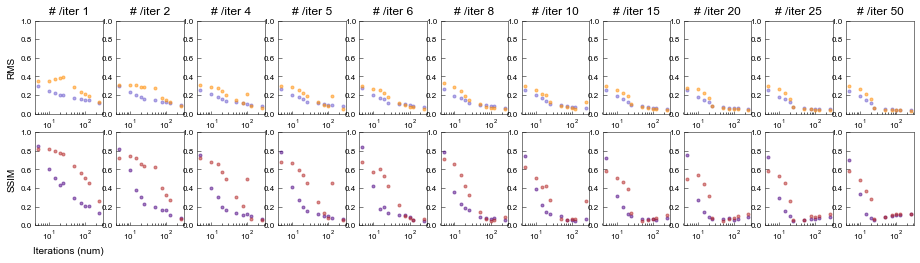

Truth NSL_theight | idx_prevar: 4 


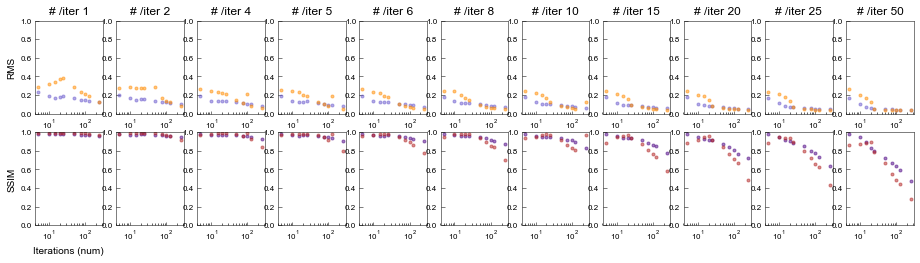



----------------------------------------------------------------
./data/RISK_NSL_theight_n_3_vset_1.npz
('alwaysdark', 0.2)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


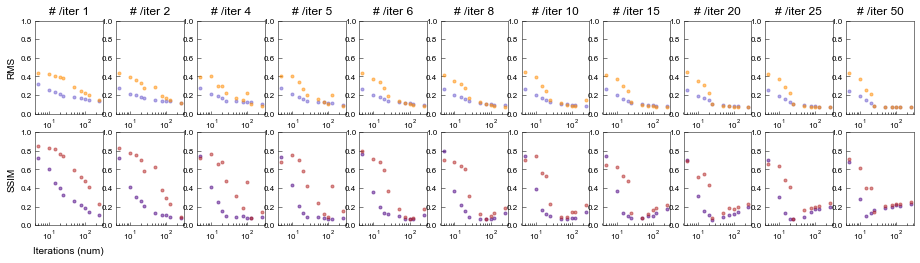

Truth NSL_theight | idx_prevar: 1 


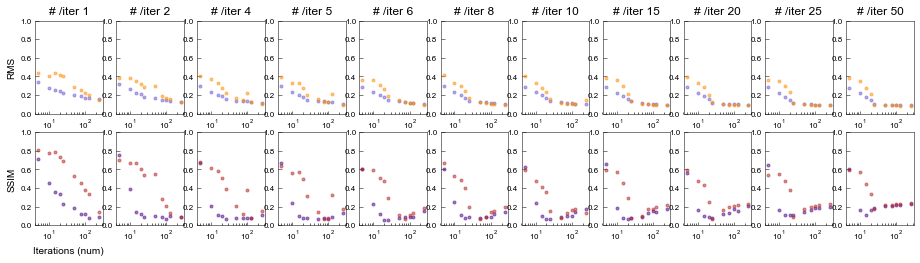

Truth NSL_theight | idx_prevar: 2 


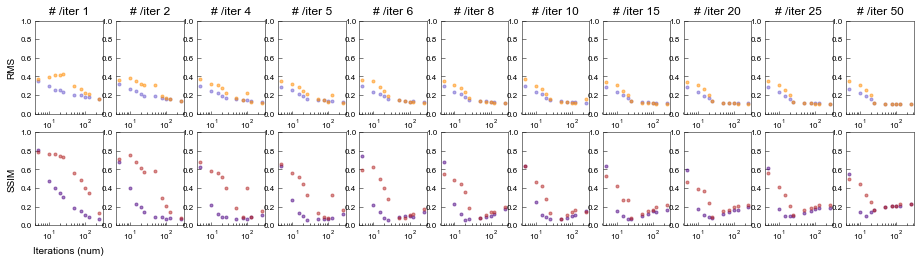

Truth NSL_theight | idx_prevar: 3 


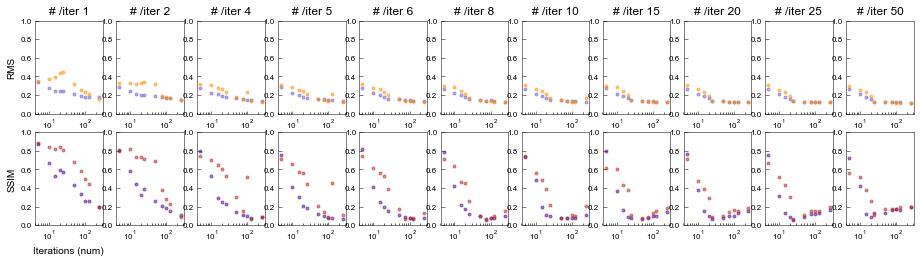

Truth NSL_theight | idx_prevar: 4 


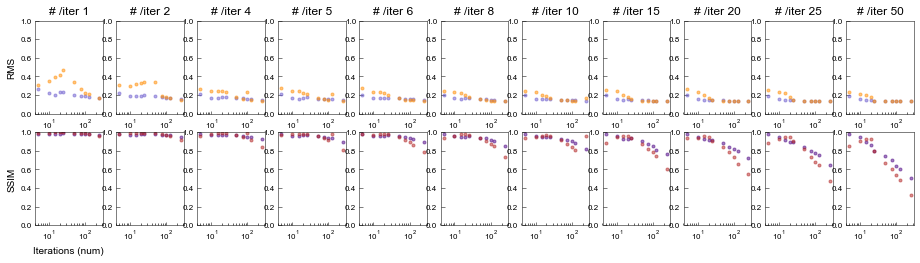



----------------------------------------------------------------
./data/RISK_NSL_theight_n_4_vset_1.npz
('spnoise', 0.2)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


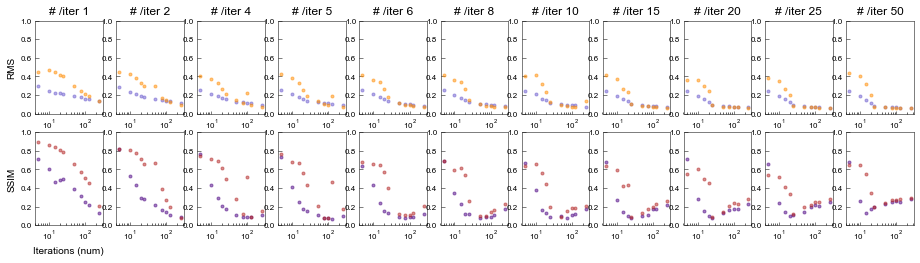

Truth NSL_theight | idx_prevar: 1 


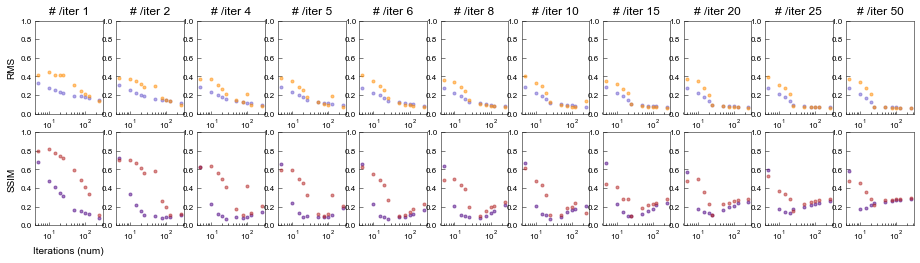

Truth NSL_theight | idx_prevar: 2 


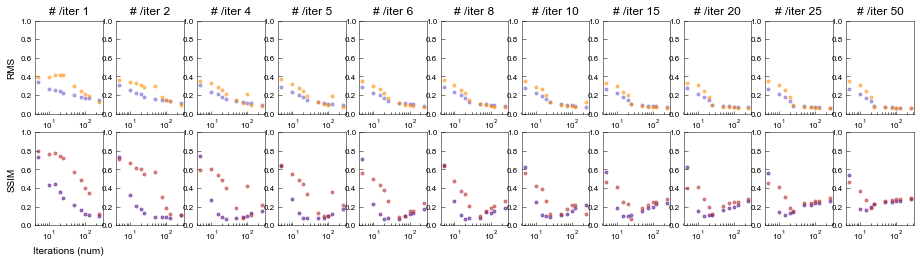

Truth NSL_theight | idx_prevar: 3 


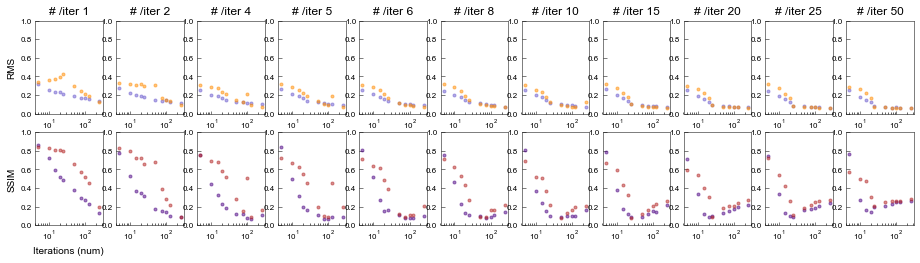

Truth NSL_theight | idx_prevar: 4 


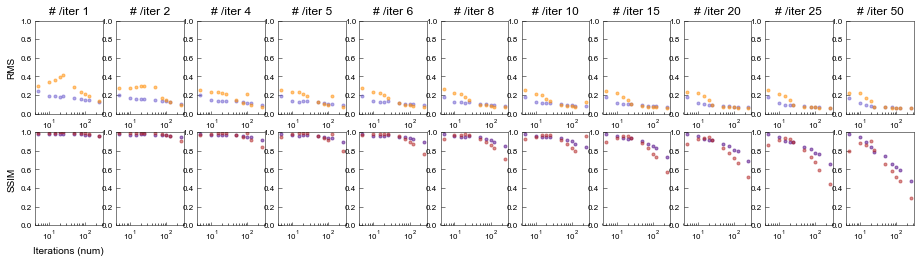



----------------------------------------------------------------
./data/RISK_NSL_theight_n_5_vset_1.npz
('alwaysdark', 0.3)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


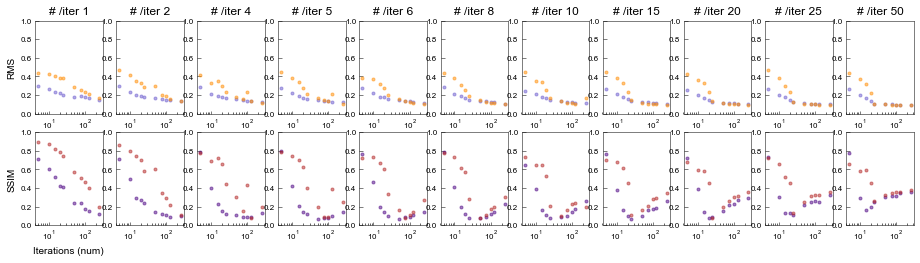

Truth NSL_theight | idx_prevar: 1 


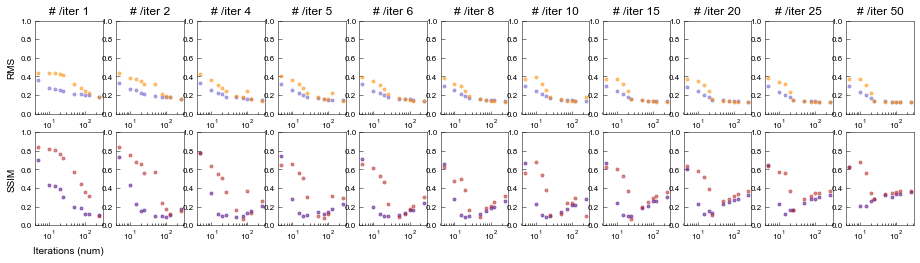

Truth NSL_theight | idx_prevar: 2 


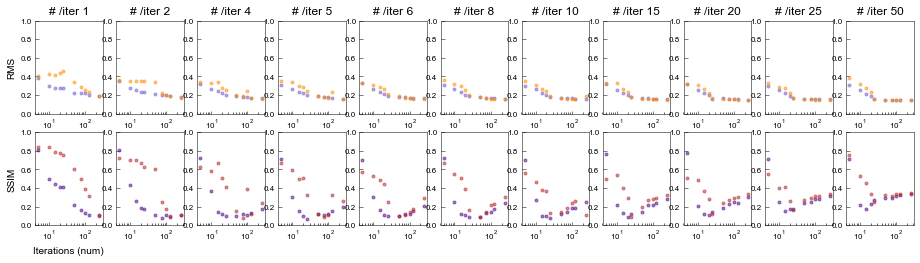

Truth NSL_theight | idx_prevar: 3 


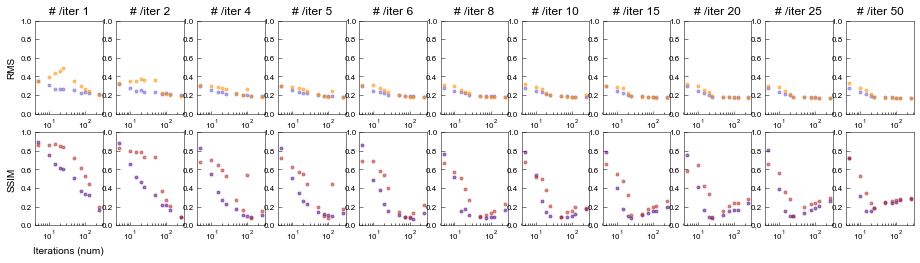

Truth NSL_theight | idx_prevar: 4 


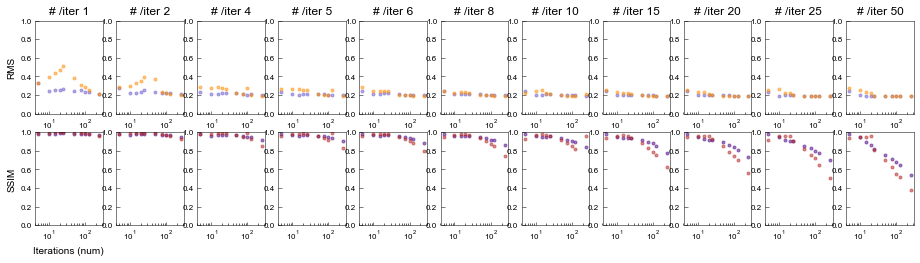



----------------------------------------------------------------
./data/RISK_NSL_theight_n_6_vset_1.npz
('spnoise', 0.3)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


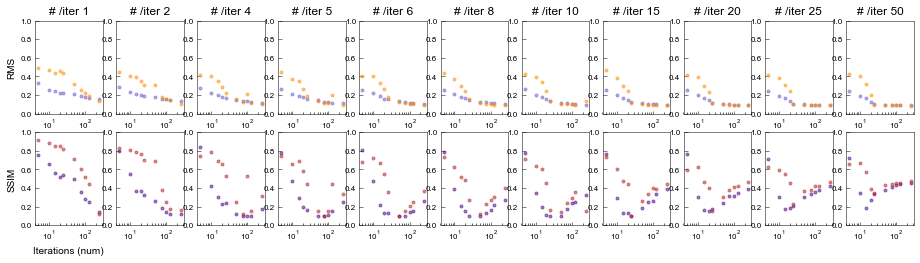

Truth NSL_theight | idx_prevar: 1 


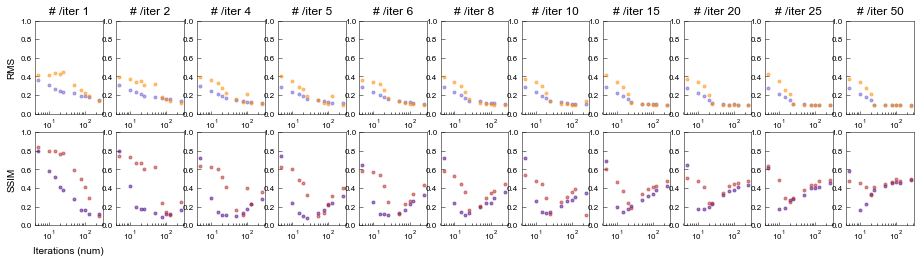

Truth NSL_theight | idx_prevar: 2 


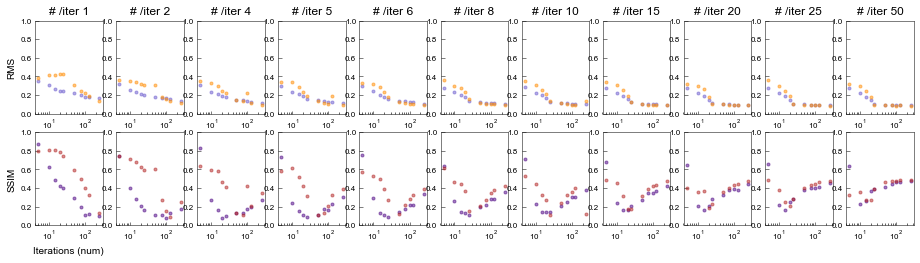

Truth NSL_theight | idx_prevar: 3 


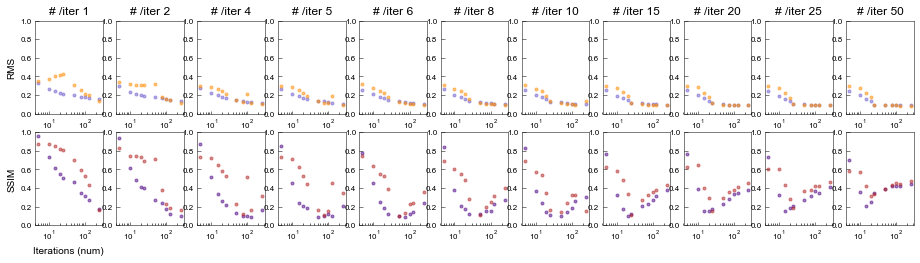

Truth NSL_theight | idx_prevar: 4 


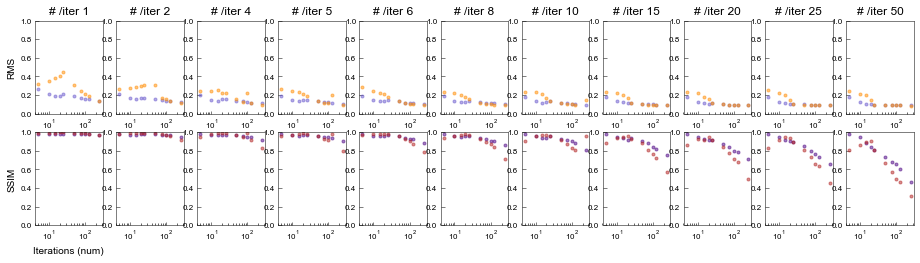



----------------------------------------------------------------
./data/RISK_NSL_theight_n_7_vset_1.npz
('alwaysdark', 0.5)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


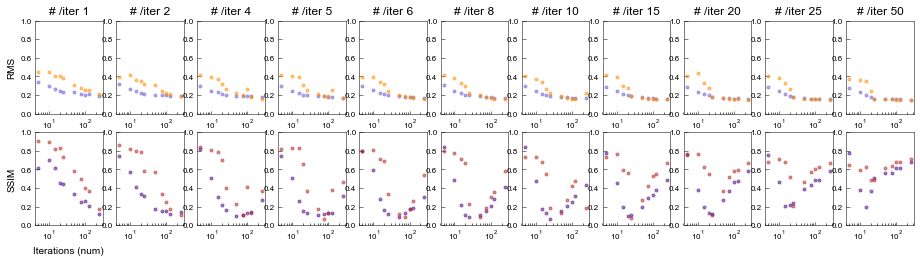

Truth NSL_theight | idx_prevar: 1 


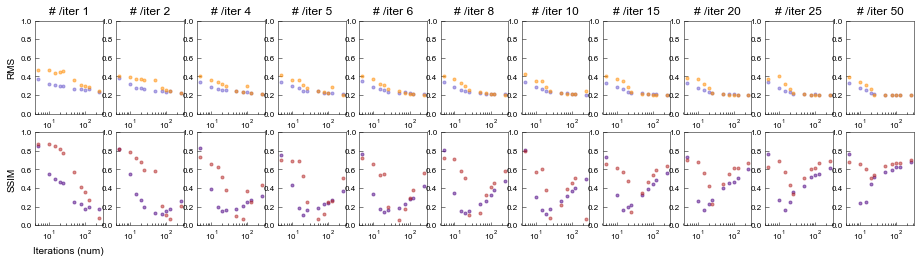

Truth NSL_theight | idx_prevar: 2 


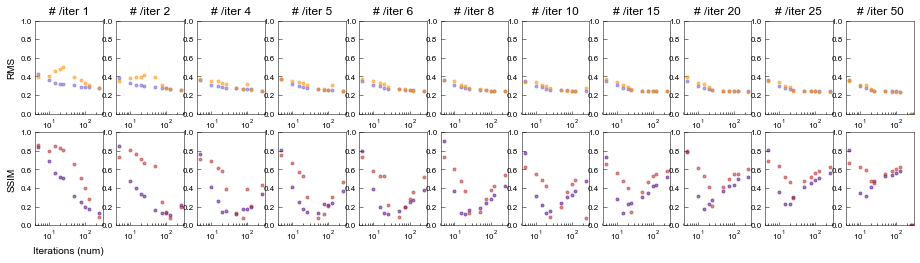

Truth NSL_theight | idx_prevar: 3 


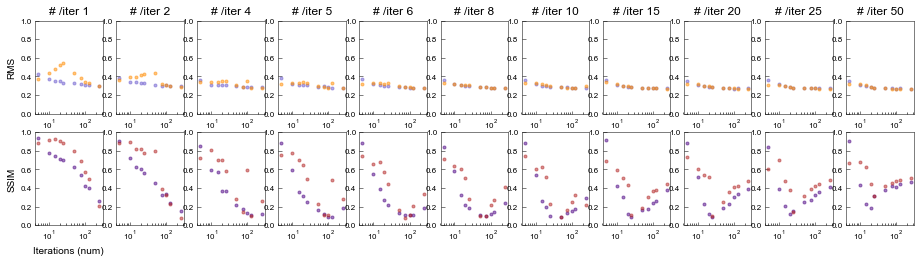

Truth NSL_theight | idx_prevar: 4 


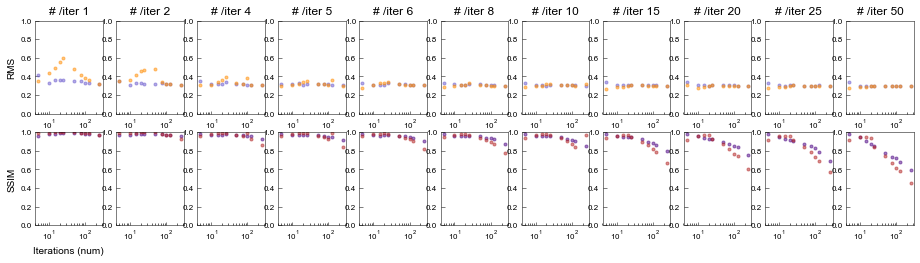



----------------------------------------------------------------
./data/RISK_NSL_theight_n_8_vset_1.npz
('spnoise', 0.5)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


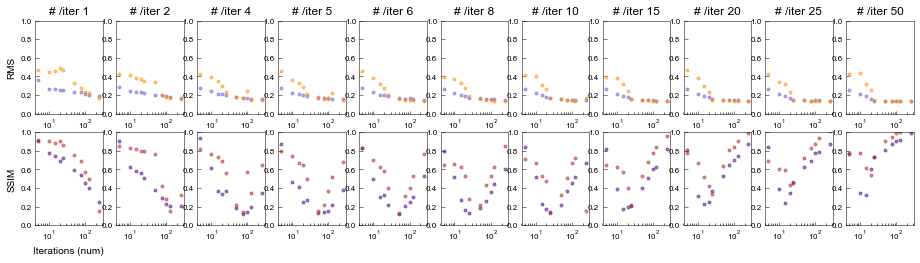

Truth NSL_theight | idx_prevar: 1 


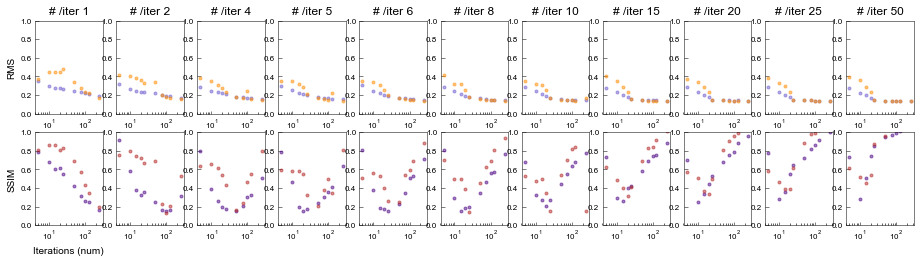

Truth NSL_theight | idx_prevar: 2 


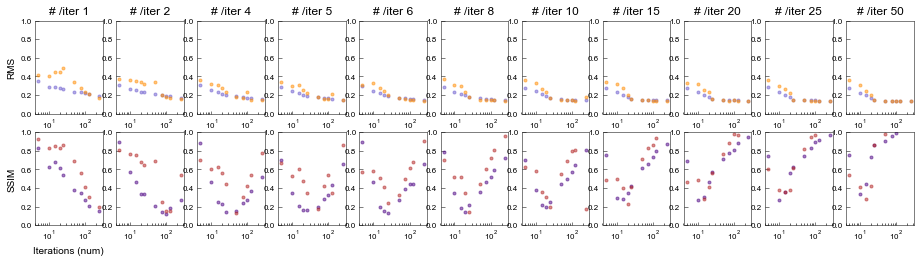

Truth NSL_theight | idx_prevar: 3 


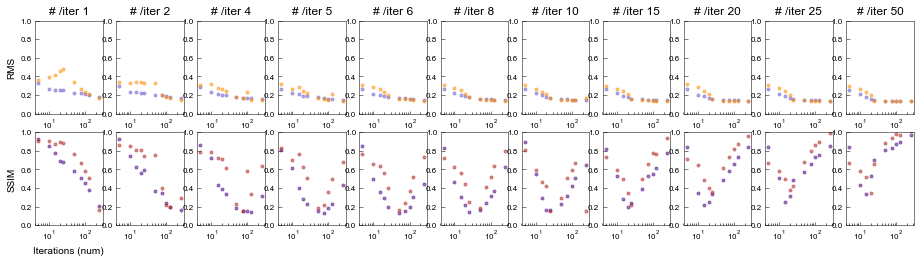

Truth NSL_theight | idx_prevar: 4 


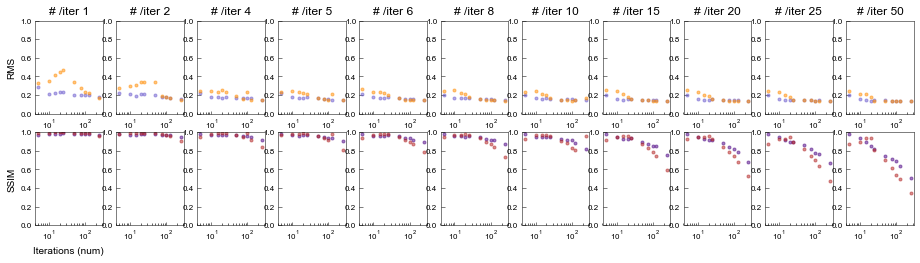

In [9]:
counter = 0 
truthname = 'NSL_tfloor'
noisevarlist = meta_noisevar_scan*2
for filename in msmtperqubitlist:
    
    print '----------------------------------------------------------------'
    print filename
    print noisevarlist[counter]
    print '----------------------------------------------------------------'
    print 
    
    if counter > 8:
        truthname = 'NSL_theight'
    
    full_data_matrix = np.load(filename)["full_data_matrix"]
    plot_iter_v_variable(ParamUpdater, full_data_matrix, truthname=truthname)
    
    print
    print
    
    counter+=1
    

## Forgetting factors for quasi-msmts
** as a function of truth type, noise type and total iterations **

----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_0_vset_0.npz
('noiseless', 0.0)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


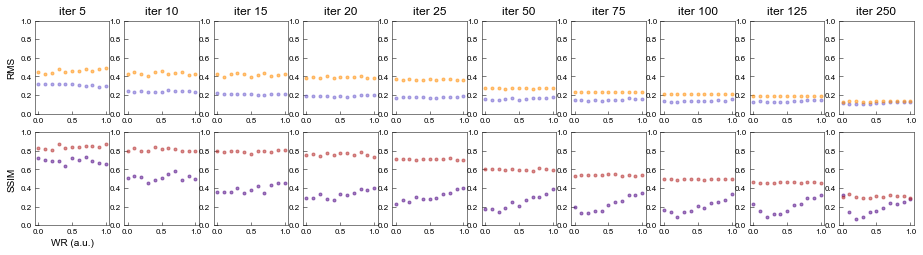

Truth NSL_tfloor | idx_prevar: 1 


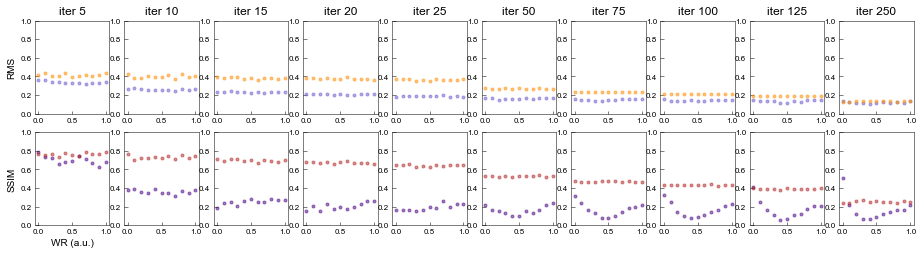

Truth NSL_tfloor | idx_prevar: 2 


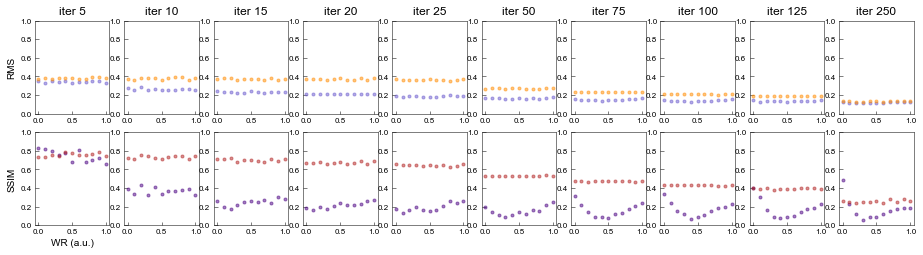

Truth NSL_tfloor | idx_prevar: 3 


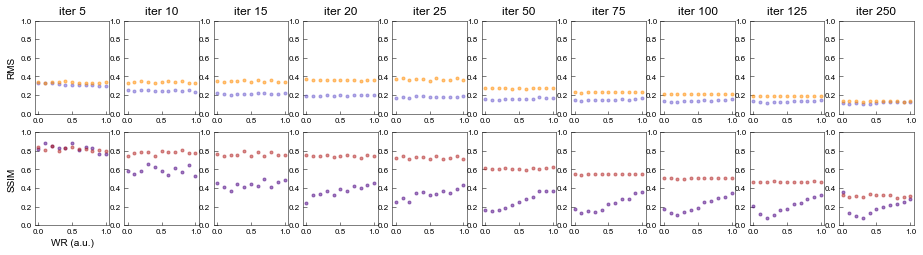

Truth NSL_tfloor | idx_prevar: 4 


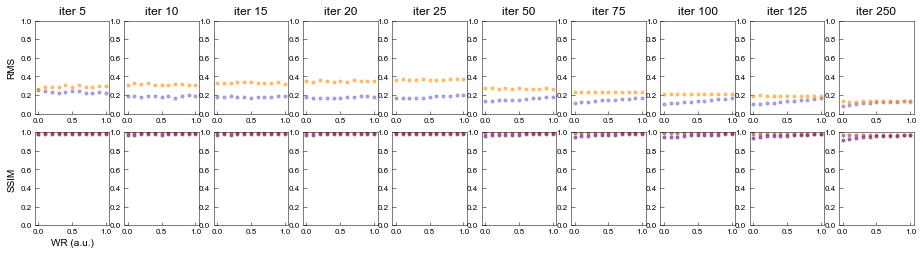



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_1_vset_0.npz
('alwaysdark', 0.1)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


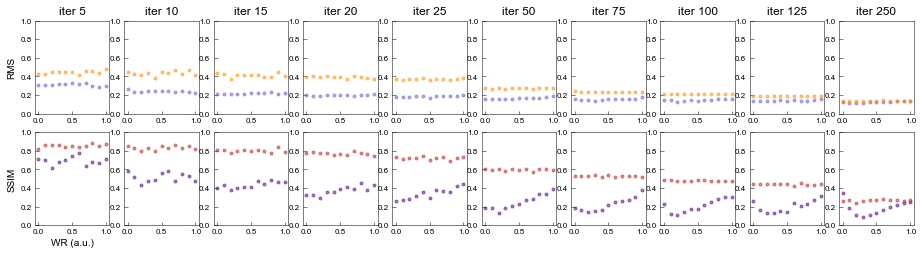

Truth NSL_tfloor | idx_prevar: 1 


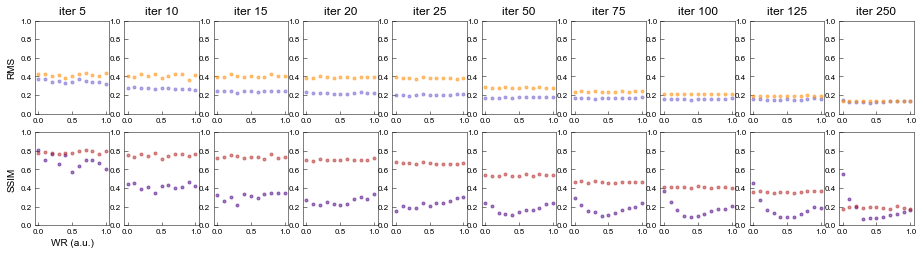

Truth NSL_tfloor | idx_prevar: 2 


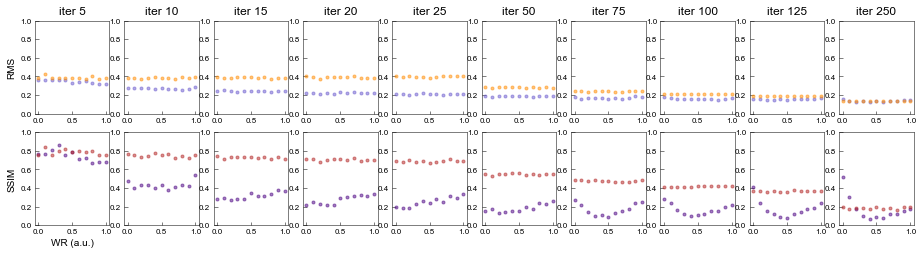

Truth NSL_tfloor | idx_prevar: 3 


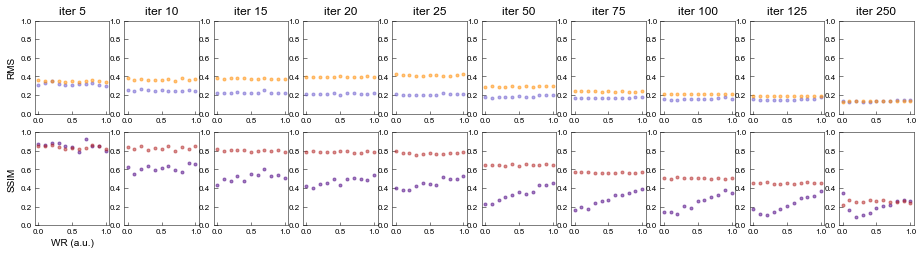

Truth NSL_tfloor | idx_prevar: 4 


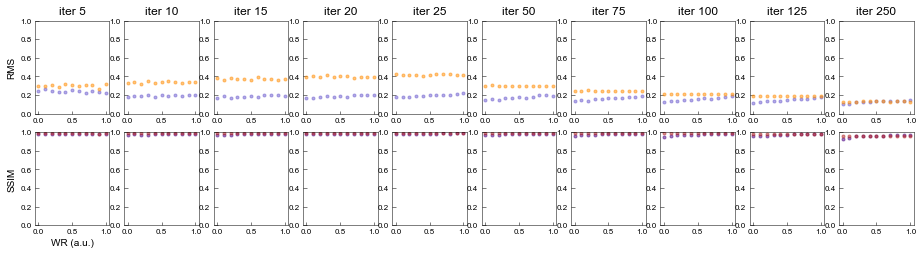



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_2_vset_0.npz
('spnoise', 0.1)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


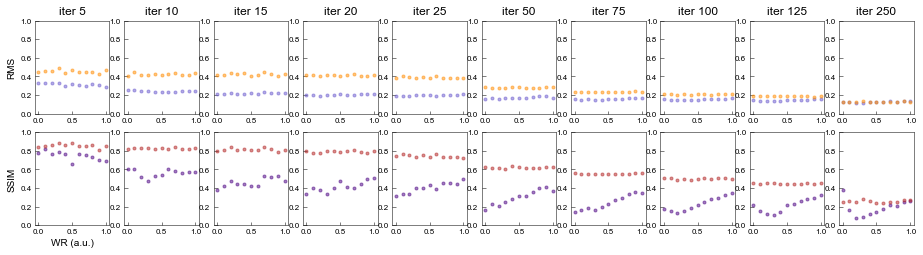

Truth NSL_tfloor | idx_prevar: 1 


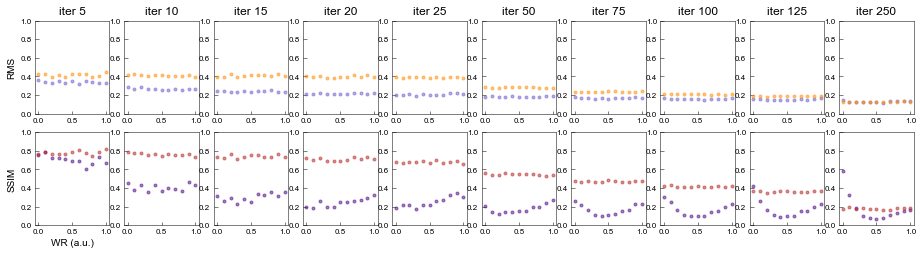

Truth NSL_tfloor | idx_prevar: 2 


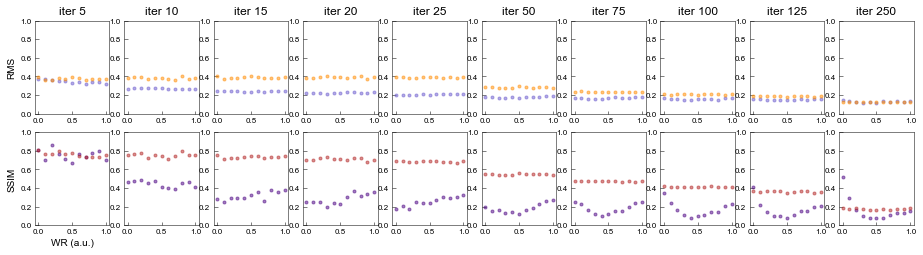

Truth NSL_tfloor | idx_prevar: 3 


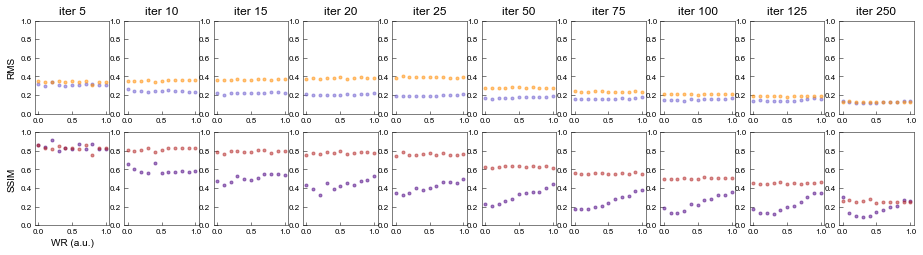

Truth NSL_tfloor | idx_prevar: 4 


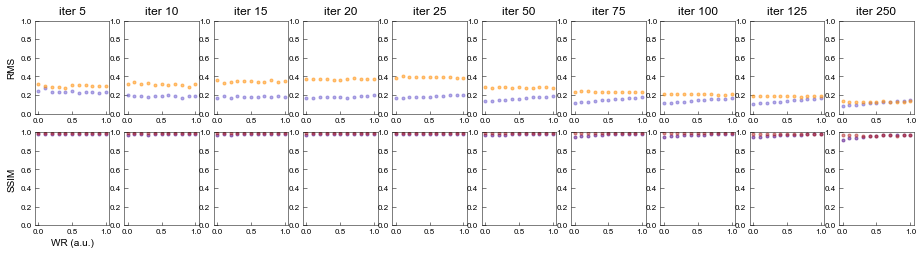



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_3_vset_0.npz
('alwaysdark', 0.2)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


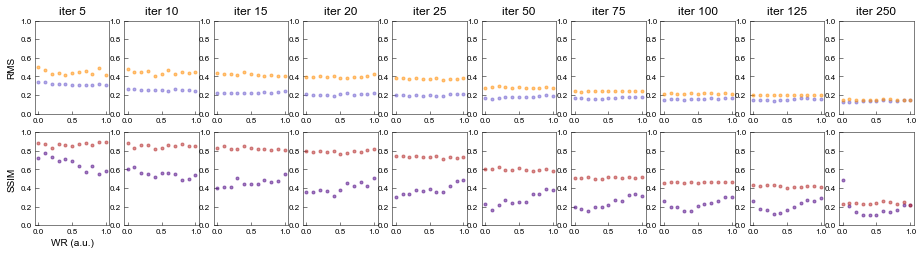

Truth NSL_tfloor | idx_prevar: 1 


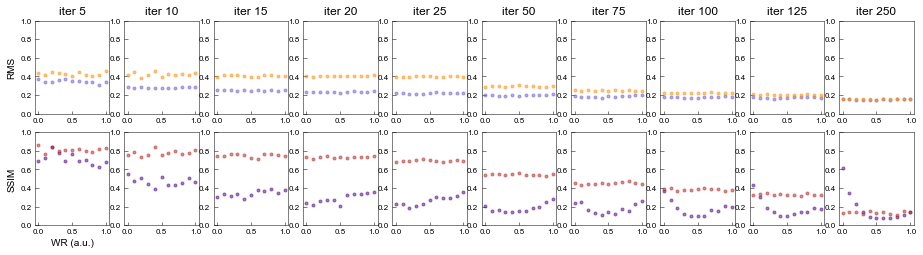

Truth NSL_tfloor | idx_prevar: 2 


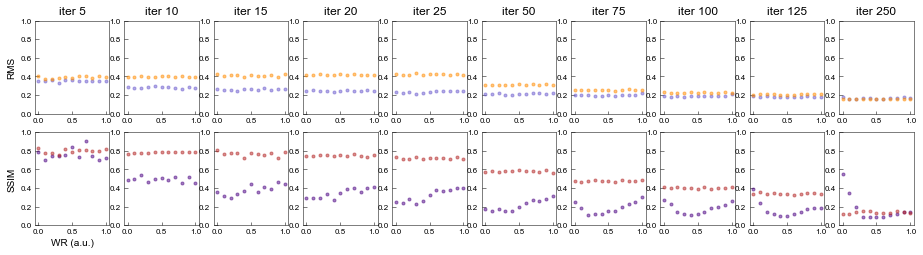

Truth NSL_tfloor | idx_prevar: 3 


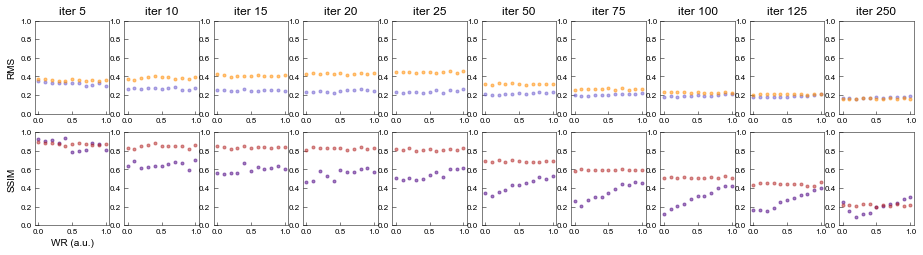

Truth NSL_tfloor | idx_prevar: 4 


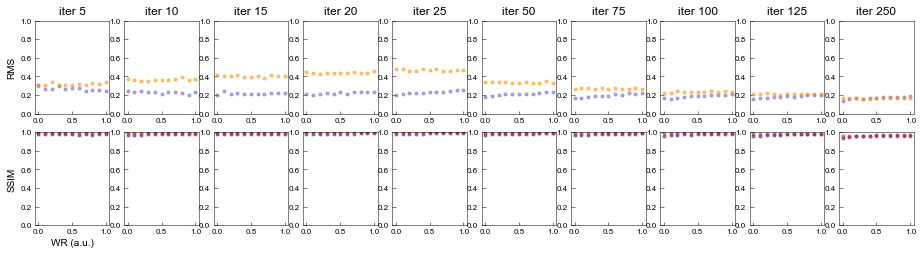



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_4_vset_0.npz
('spnoise', 0.2)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


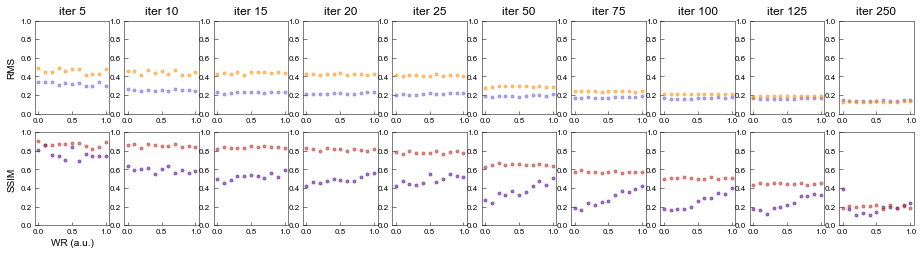

Truth NSL_tfloor | idx_prevar: 1 


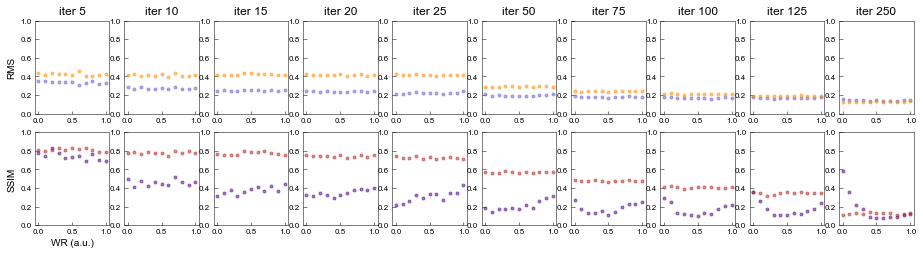

Truth NSL_tfloor | idx_prevar: 2 


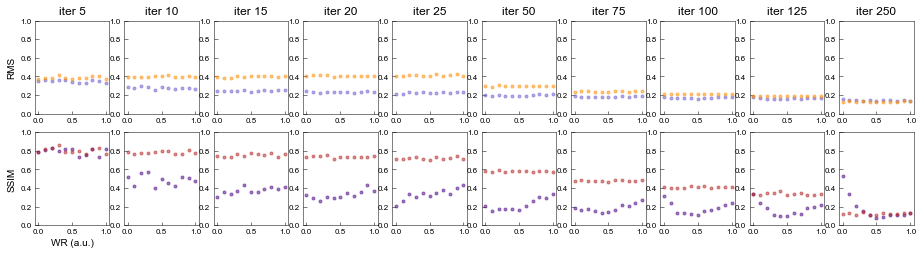

Truth NSL_tfloor | idx_prevar: 3 


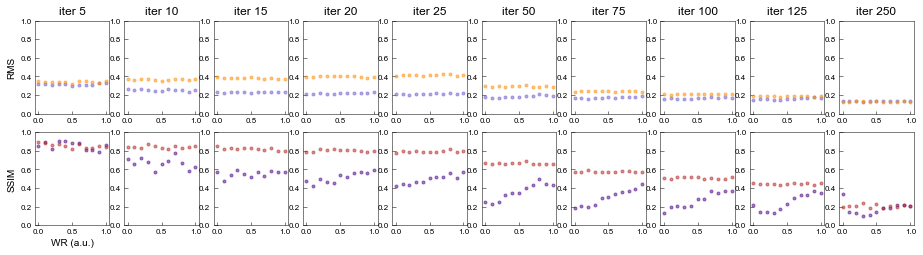

Truth NSL_tfloor | idx_prevar: 4 


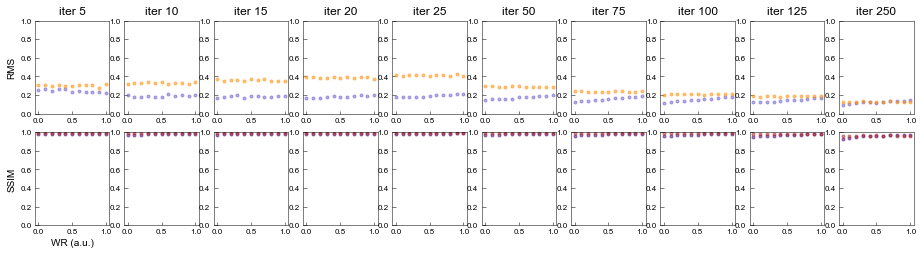



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_5_vset_0.npz
('alwaysdark', 0.3)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


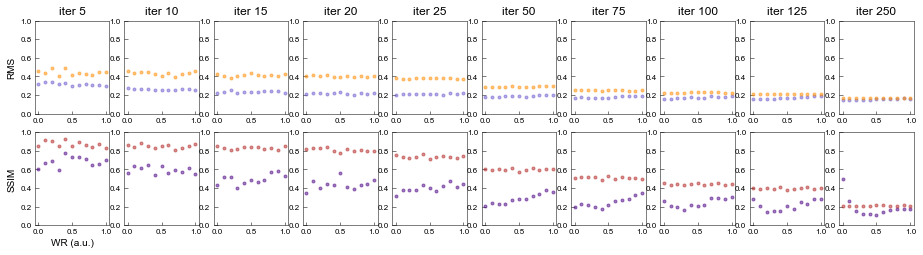

Truth NSL_tfloor | idx_prevar: 1 


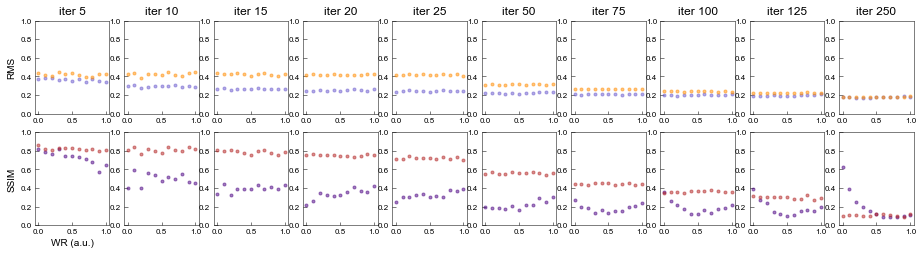

Truth NSL_tfloor | idx_prevar: 2 


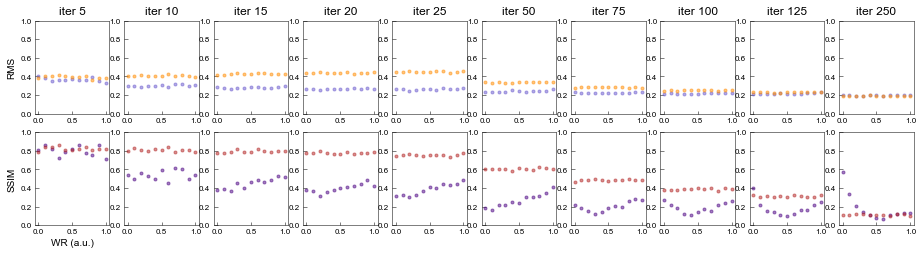

Truth NSL_tfloor | idx_prevar: 3 


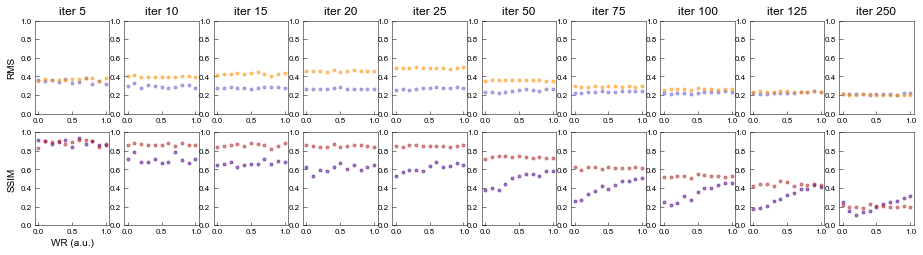

Truth NSL_tfloor | idx_prevar: 4 


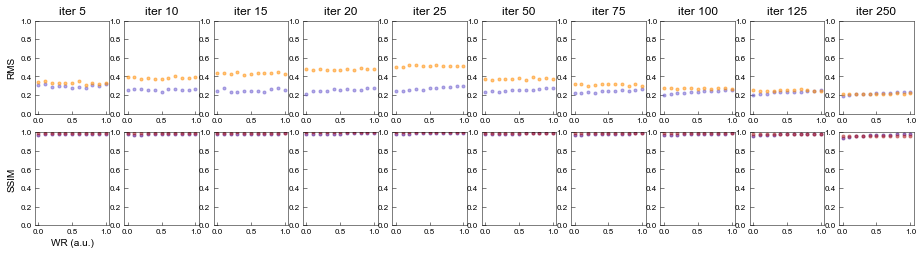



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_6_vset_0.npz
('spnoise', 0.3)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


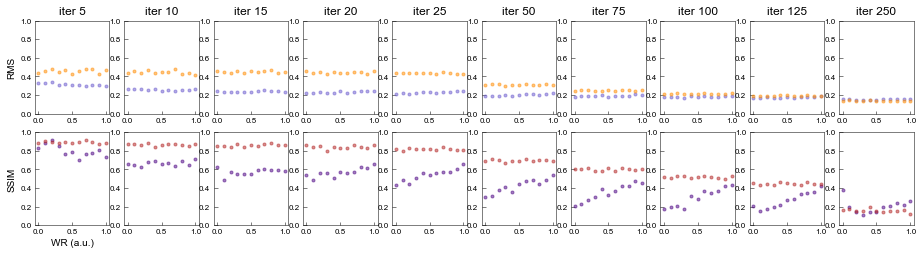

Truth NSL_tfloor | idx_prevar: 1 


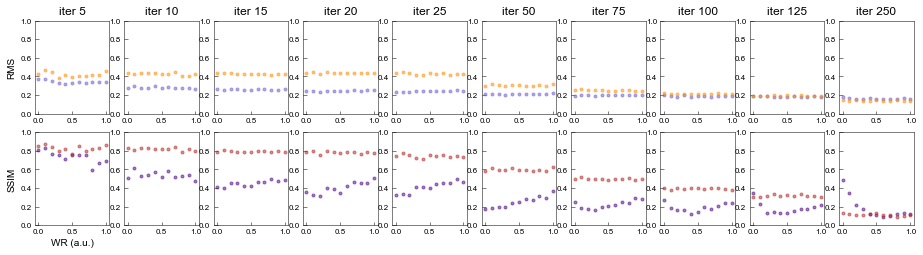

Truth NSL_tfloor | idx_prevar: 2 


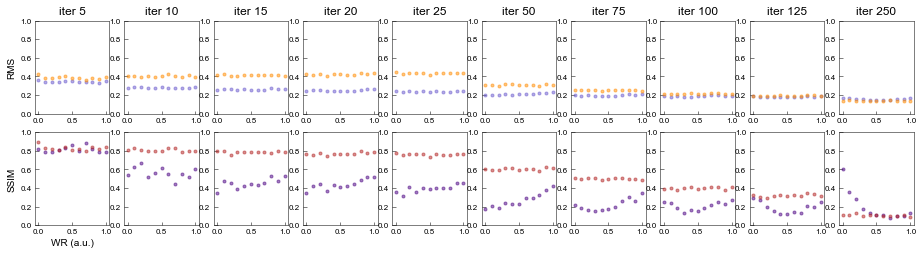

Truth NSL_tfloor | idx_prevar: 3 


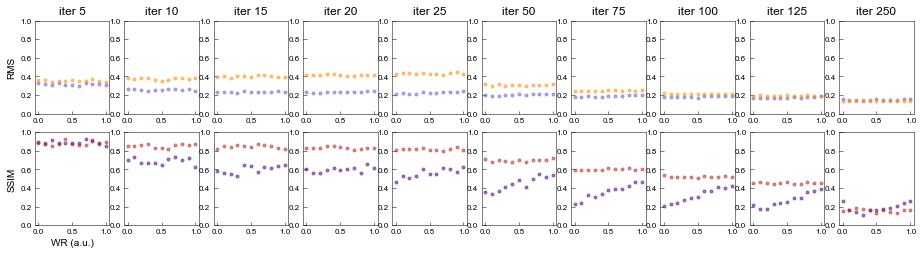

Truth NSL_tfloor | idx_prevar: 4 


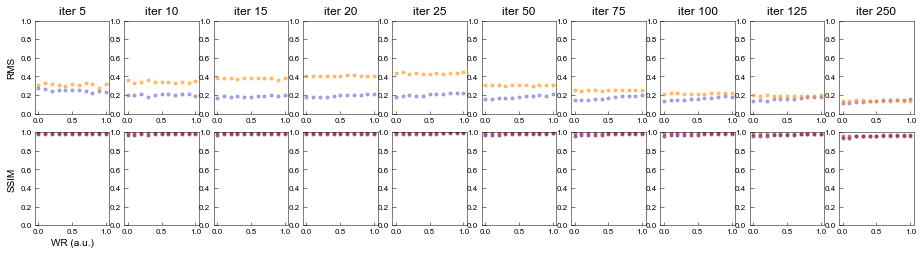



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_7_vset_0.npz
('alwaysdark', 0.5)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


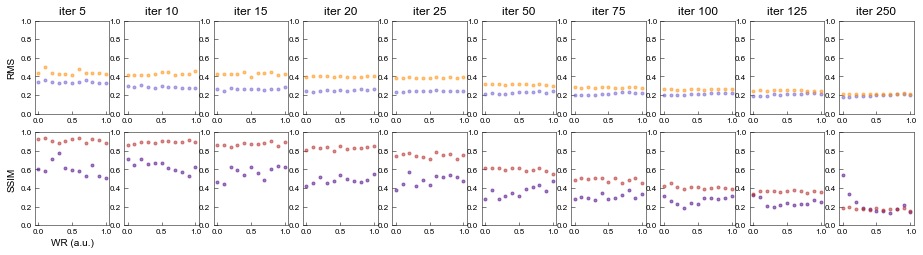

Truth NSL_tfloor | idx_prevar: 1 


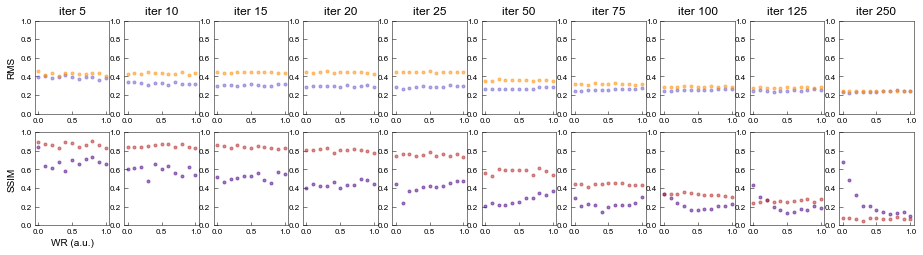

Truth NSL_tfloor | idx_prevar: 2 


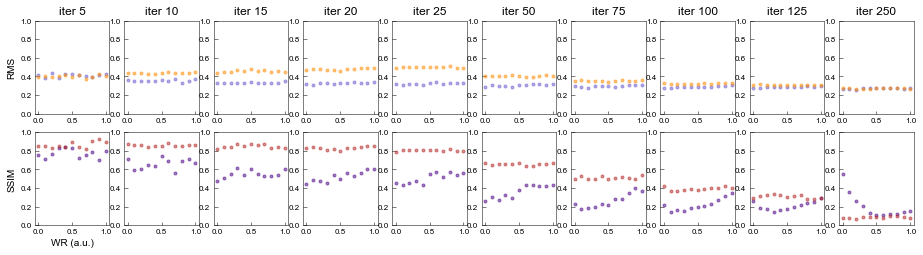

Truth NSL_tfloor | idx_prevar: 3 


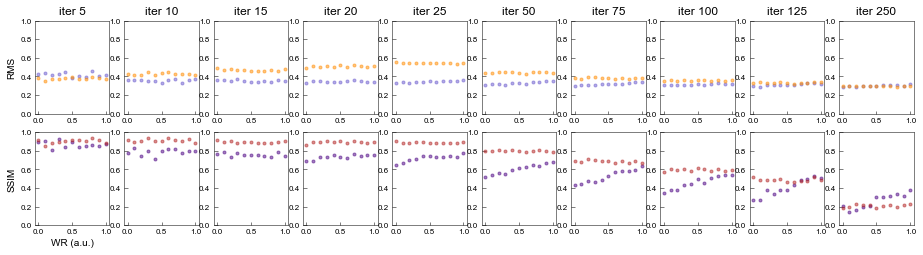

Truth NSL_tfloor | idx_prevar: 4 


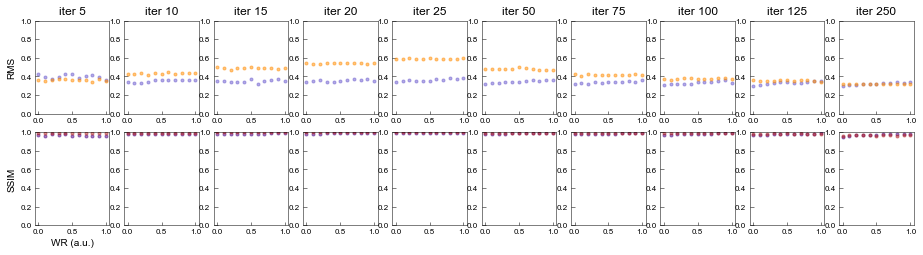



----------------------------------------------------------------
./data/RISK_NSL_tfloor_n_8_vset_0.npz
('spnoise', 0.5)
----------------------------------------------------------------

Truth NSL_tfloor | idx_prevar: 0 


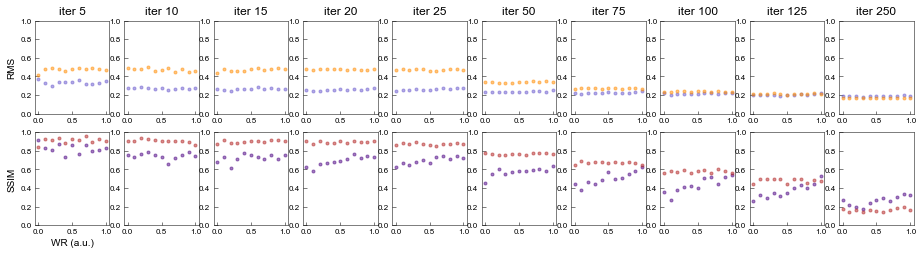

Truth NSL_tfloor | idx_prevar: 1 


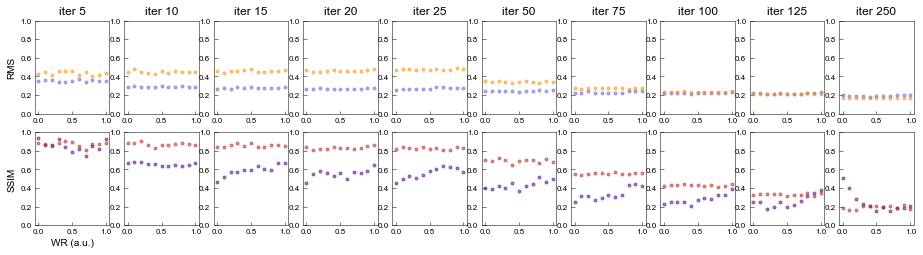

Truth NSL_tfloor | idx_prevar: 2 


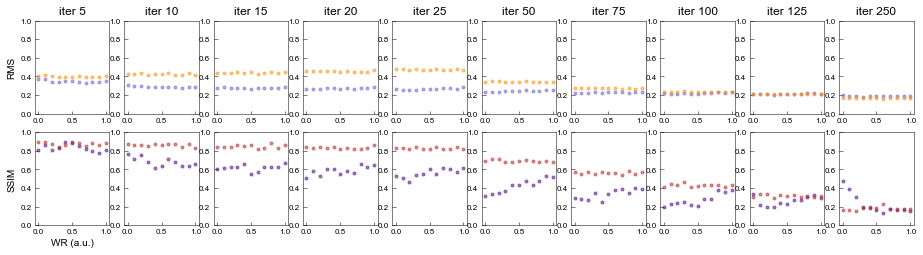

Truth NSL_tfloor | idx_prevar: 3 


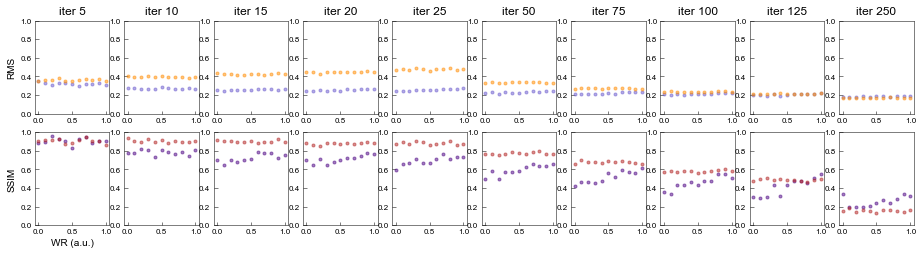

Truth NSL_tfloor | idx_prevar: 4 


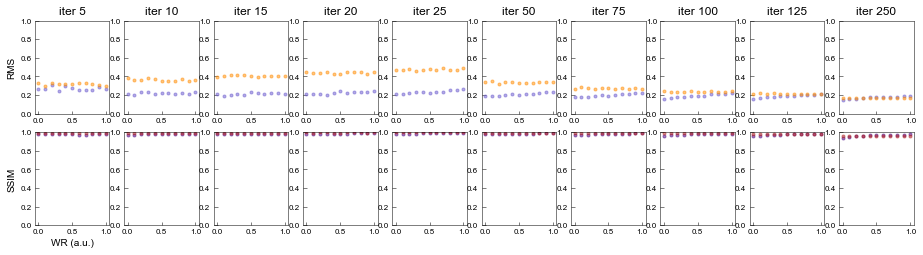



----------------------------------------------------------------
./data/RISK_NSL_theight_n_0_vset_0.npz
('noiseless', 0.0)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


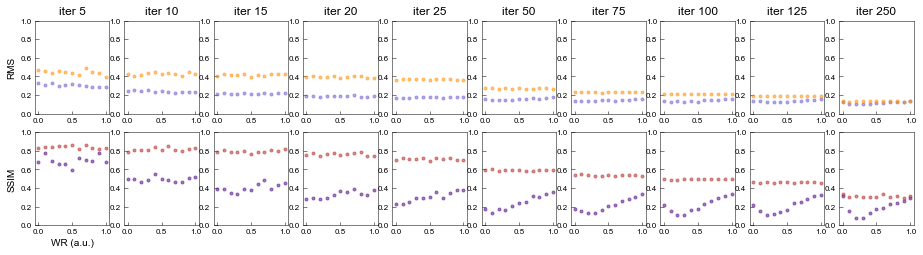

Truth NSL_theight | idx_prevar: 1 


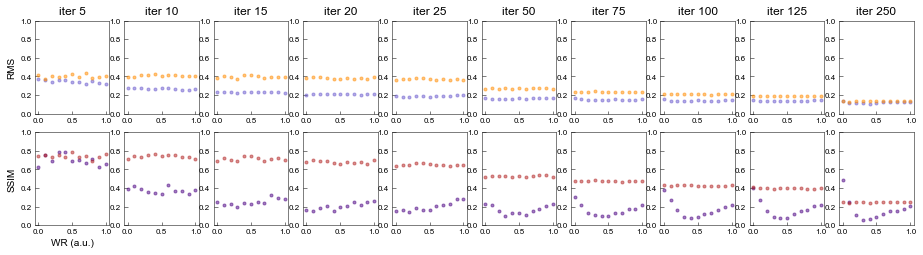

Truth NSL_theight | idx_prevar: 2 


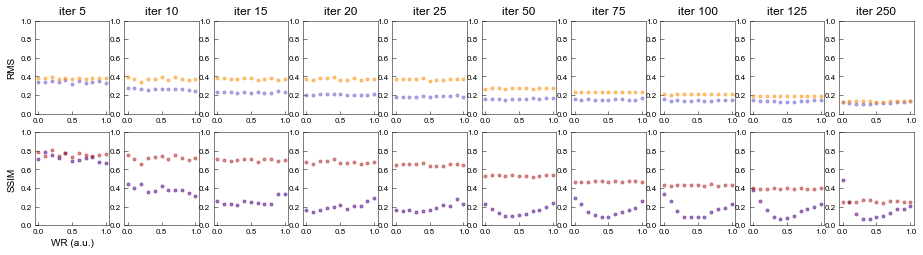

Truth NSL_theight | idx_prevar: 3 


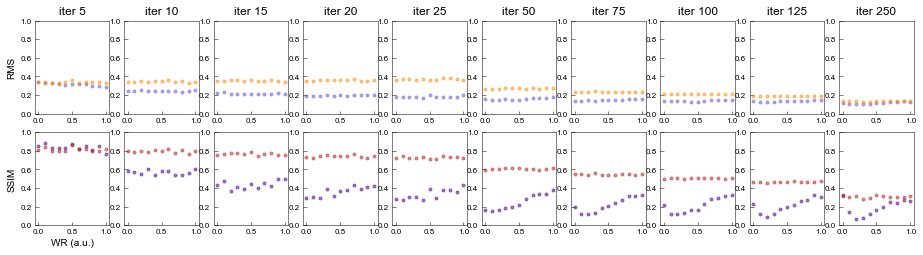

Truth NSL_theight | idx_prevar: 4 


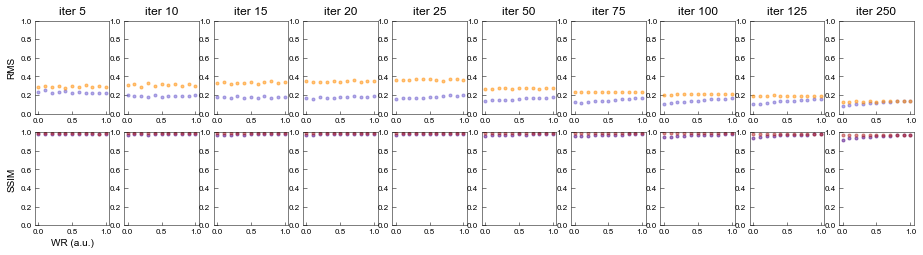



----------------------------------------------------------------
./data/RISK_NSL_theight_n_1_vset_0.npz
('alwaysdark', 0.1)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


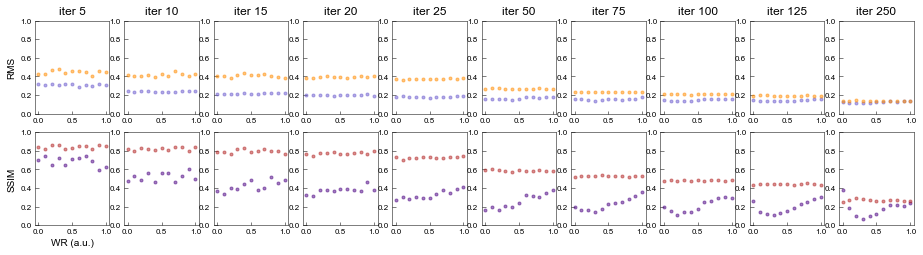

Truth NSL_theight | idx_prevar: 1 


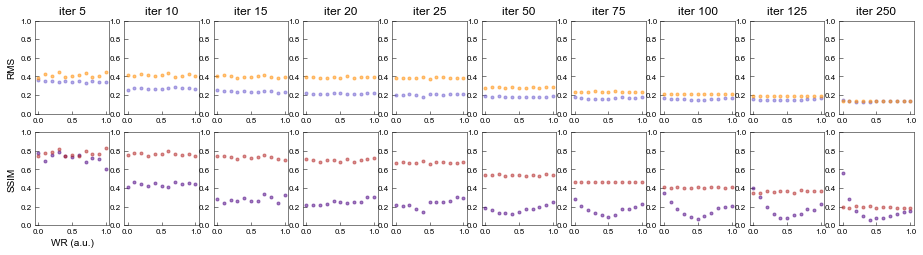

Truth NSL_theight | idx_prevar: 2 


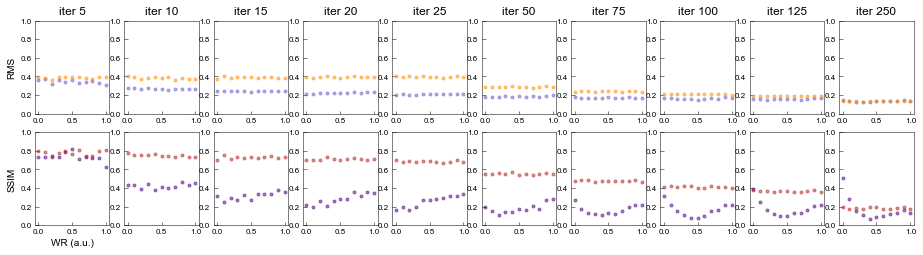

Truth NSL_theight | idx_prevar: 3 


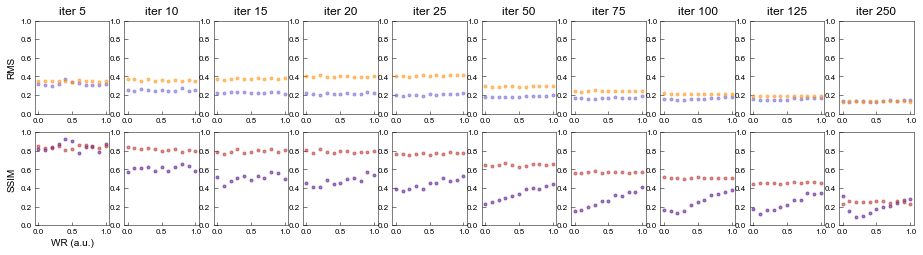

Truth NSL_theight | idx_prevar: 4 


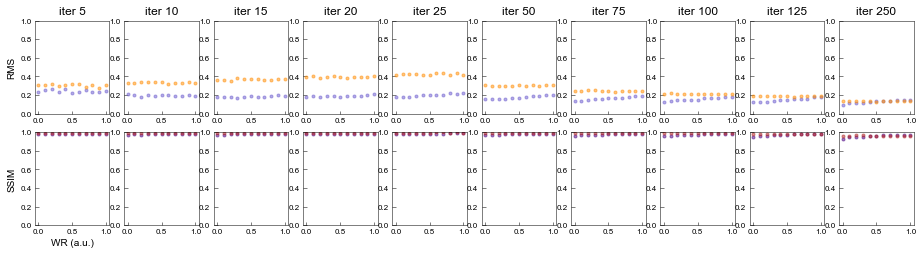



----------------------------------------------------------------
./data/RISK_NSL_theight_n_2_vset_0.npz
('spnoise', 0.1)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


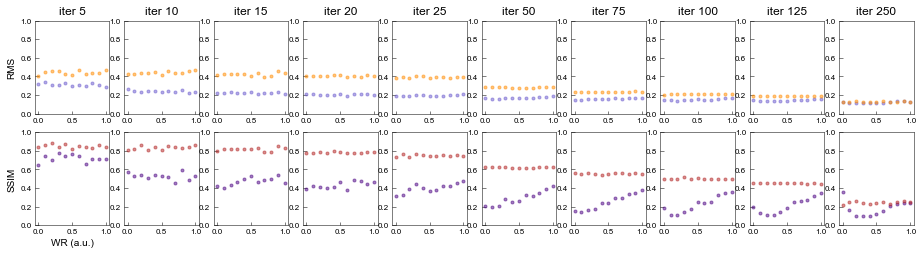

Truth NSL_theight | idx_prevar: 1 


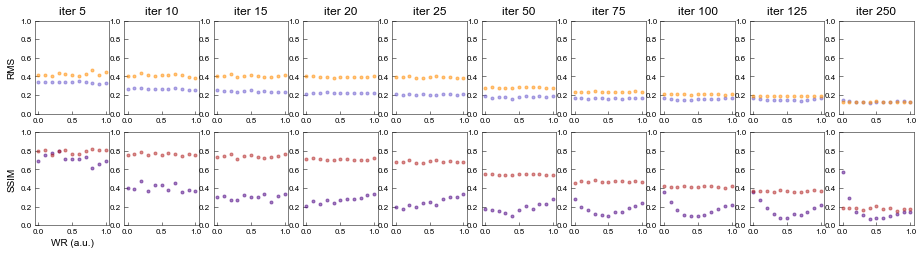

Truth NSL_theight | idx_prevar: 2 


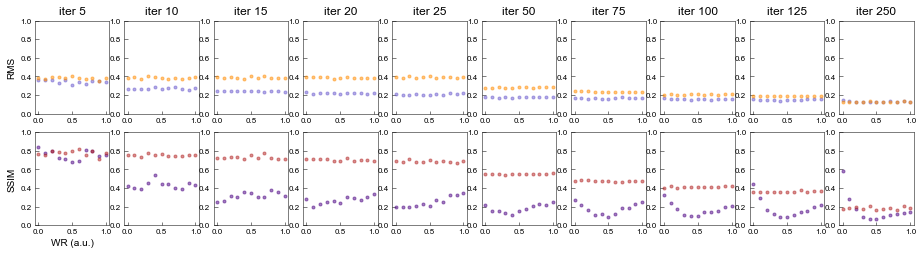

Truth NSL_theight | idx_prevar: 3 


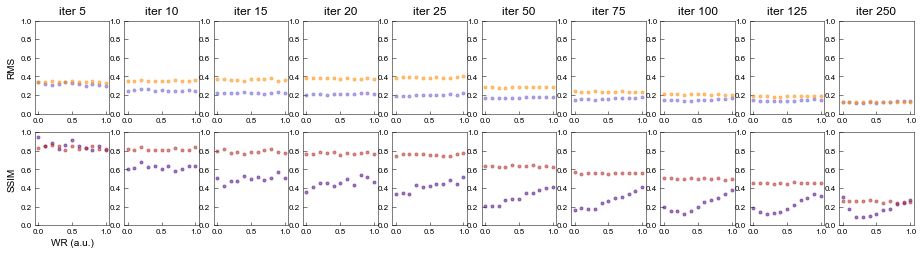

Truth NSL_theight | idx_prevar: 4 


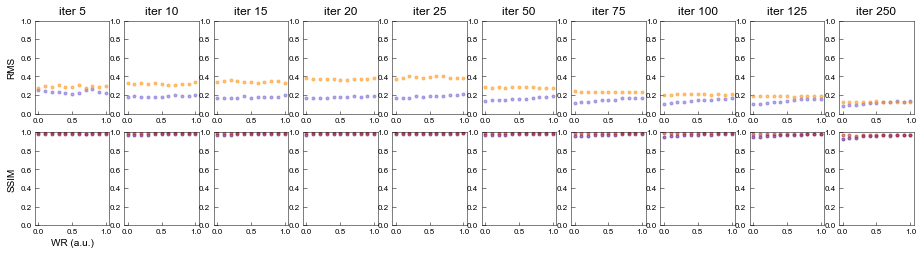



----------------------------------------------------------------
./data/RISK_NSL_theight_n_3_vset_0.npz
('alwaysdark', 0.2)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


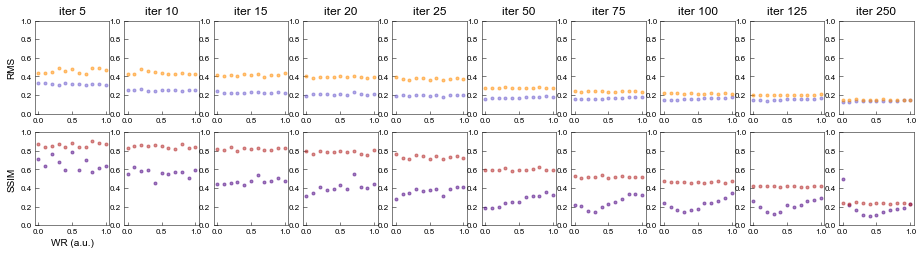

Truth NSL_theight | idx_prevar: 1 


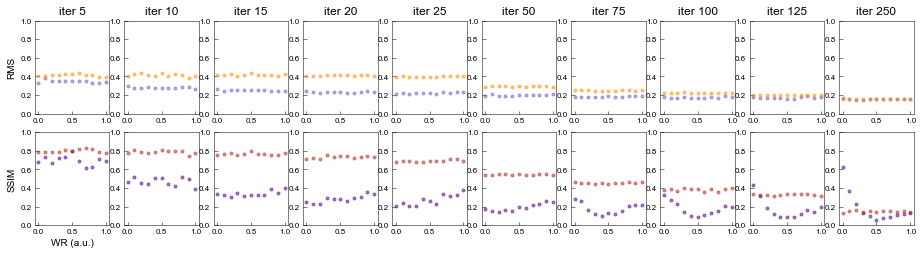

Truth NSL_theight | idx_prevar: 2 


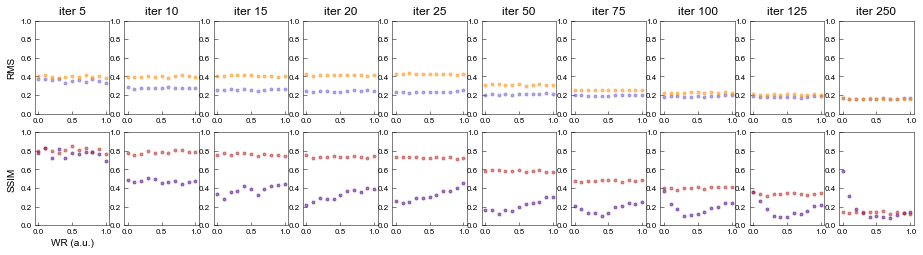

Truth NSL_theight | idx_prevar: 3 


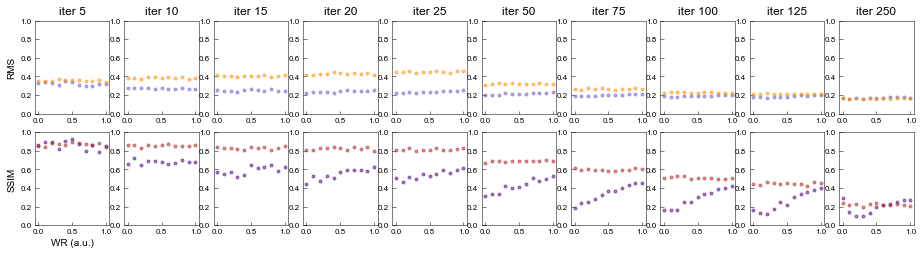

Truth NSL_theight | idx_prevar: 4 


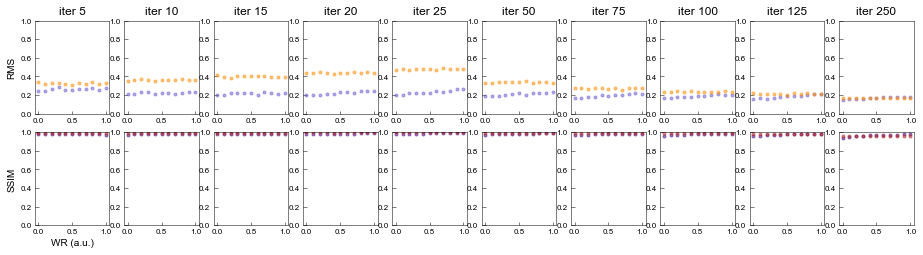



----------------------------------------------------------------
./data/RISK_NSL_theight_n_4_vset_0.npz
('spnoise', 0.2)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


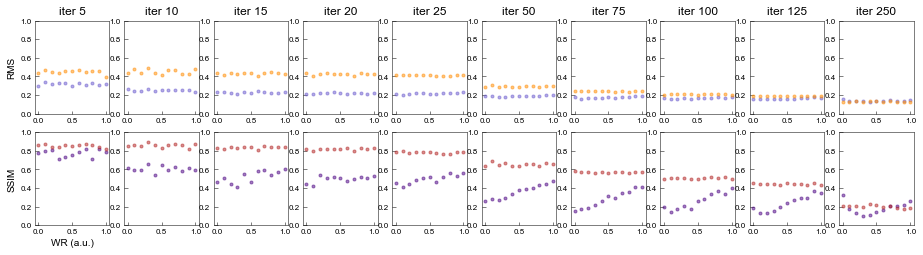

Truth NSL_theight | idx_prevar: 1 


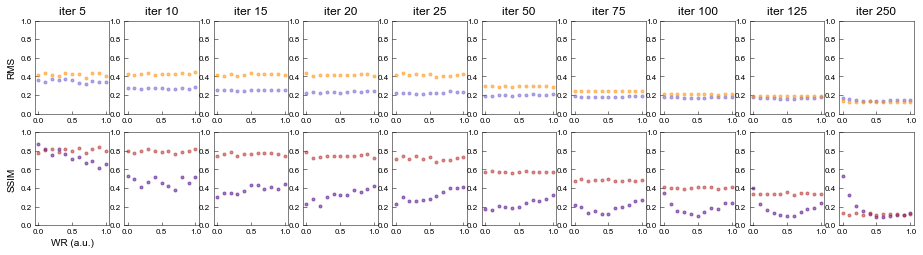

Truth NSL_theight | idx_prevar: 2 


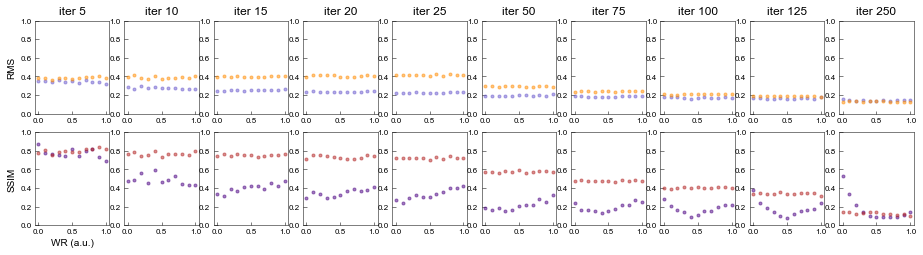

Truth NSL_theight | idx_prevar: 3 


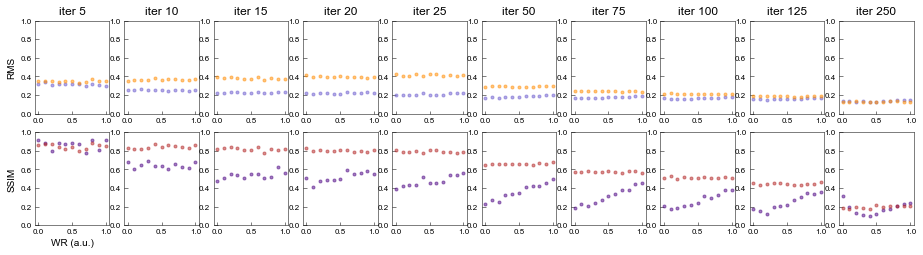

Truth NSL_theight | idx_prevar: 4 


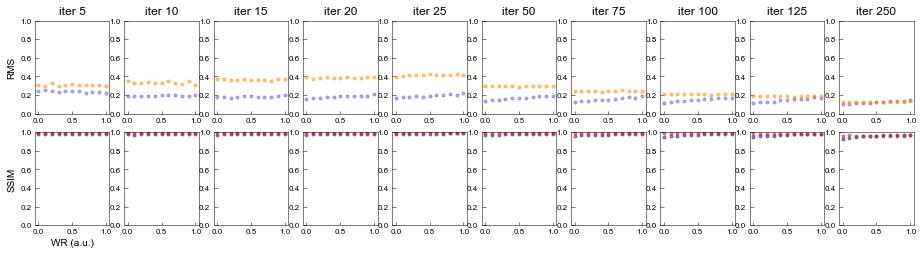



----------------------------------------------------------------
./data/RISK_NSL_theight_n_5_vset_0.npz
('alwaysdark', 0.3)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


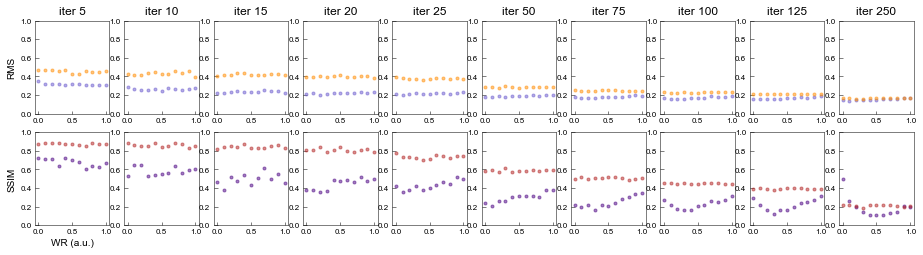

Truth NSL_theight | idx_prevar: 1 


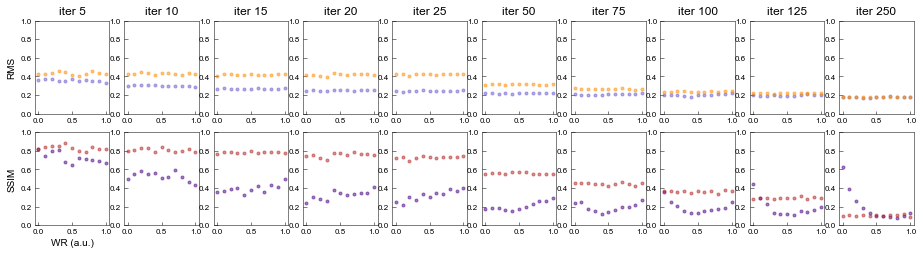

Truth NSL_theight | idx_prevar: 2 


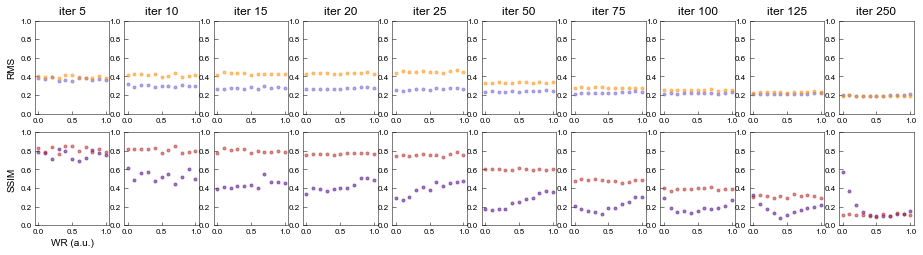

Truth NSL_theight | idx_prevar: 3 


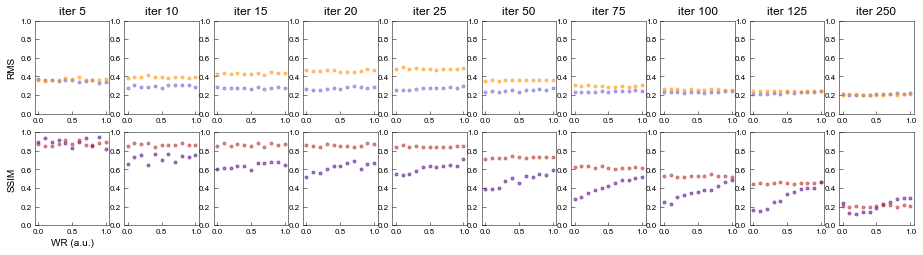

Truth NSL_theight | idx_prevar: 4 


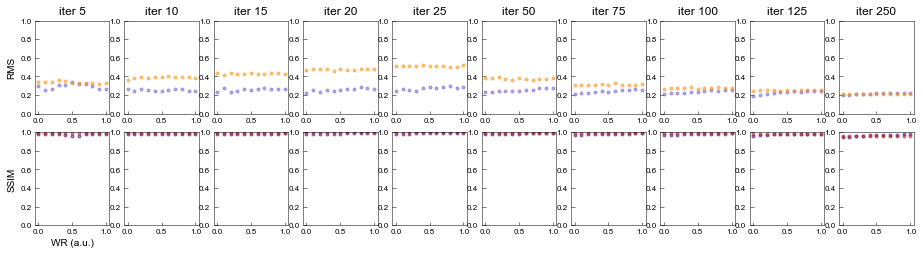



----------------------------------------------------------------
./data/RISK_NSL_theight_n_6_vset_0.npz
('spnoise', 0.3)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


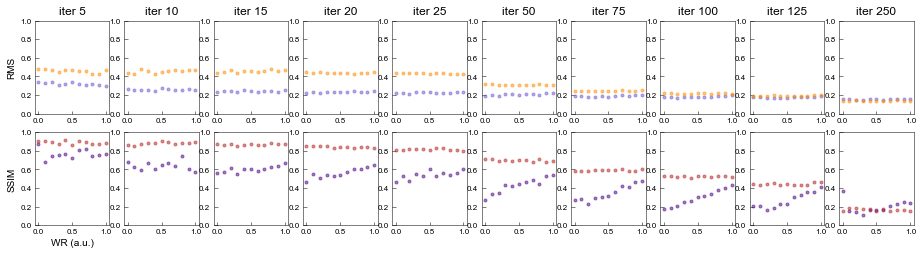

Truth NSL_theight | idx_prevar: 1 


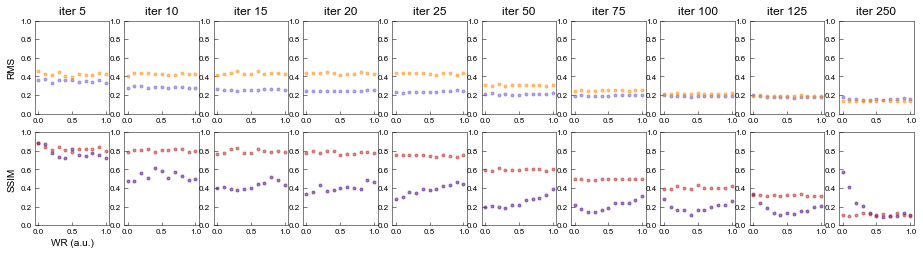

Truth NSL_theight | idx_prevar: 2 


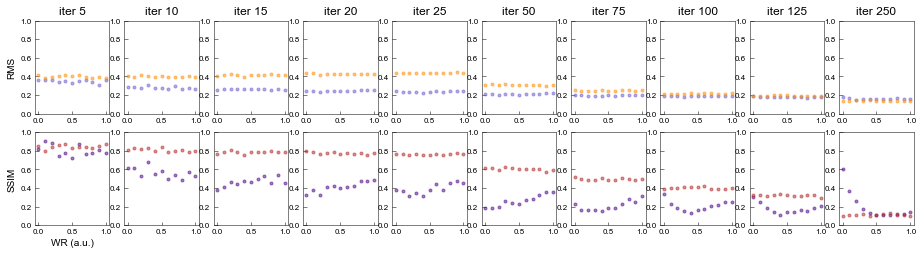

Truth NSL_theight | idx_prevar: 3 


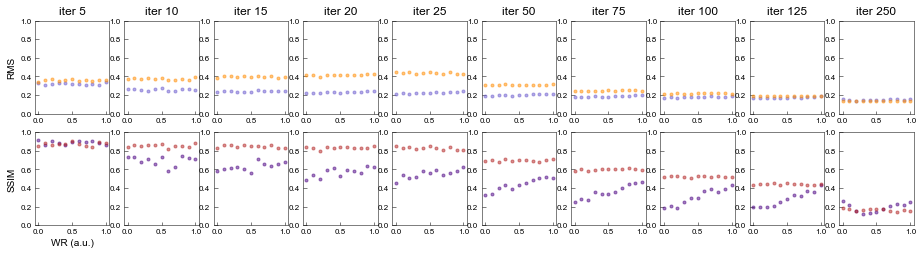

Truth NSL_theight | idx_prevar: 4 


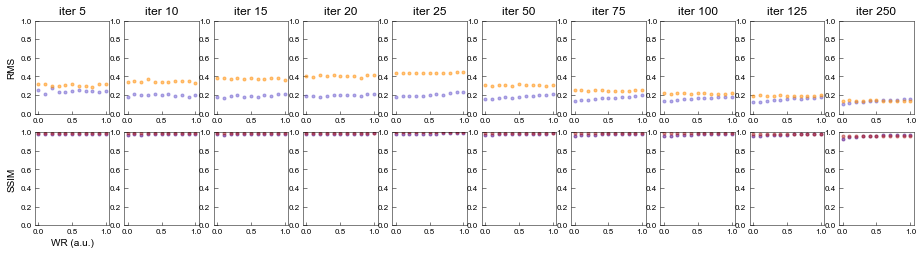



----------------------------------------------------------------
./data/RISK_NSL_theight_n_7_vset_0.npz
('alwaysdark', 0.5)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


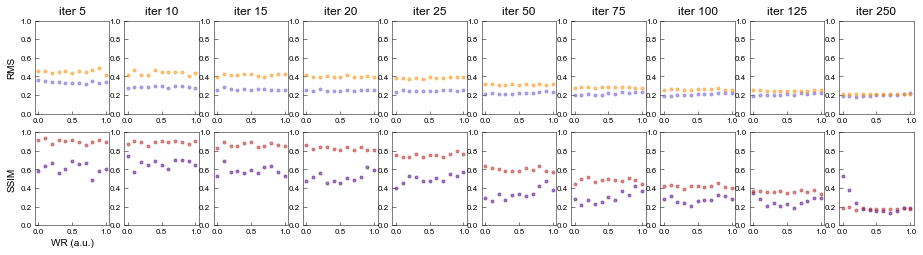

Truth NSL_theight | idx_prevar: 1 


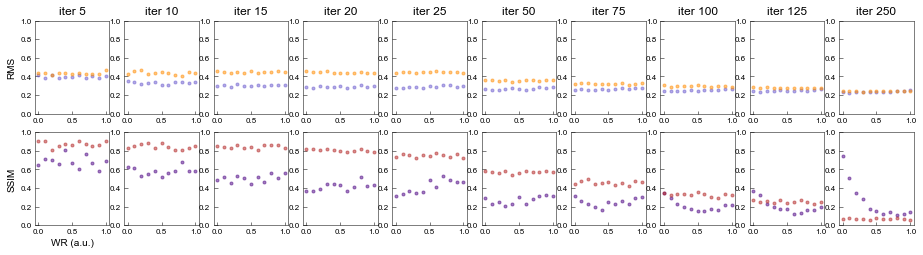

Truth NSL_theight | idx_prevar: 2 


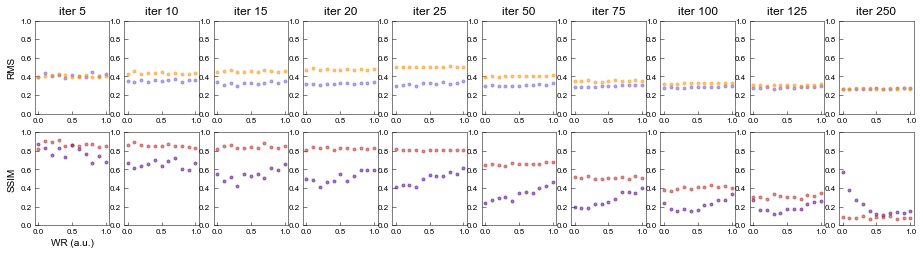

Truth NSL_theight | idx_prevar: 3 


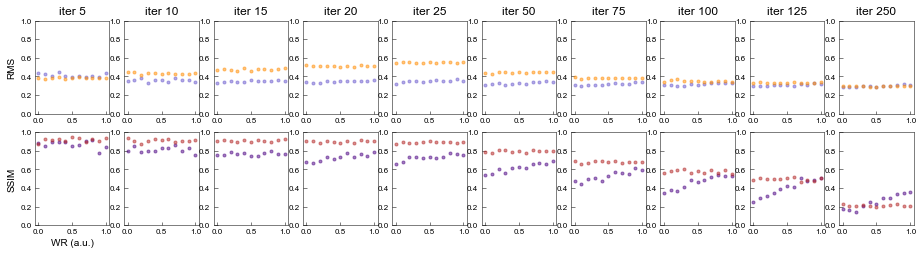

Truth NSL_theight | idx_prevar: 4 


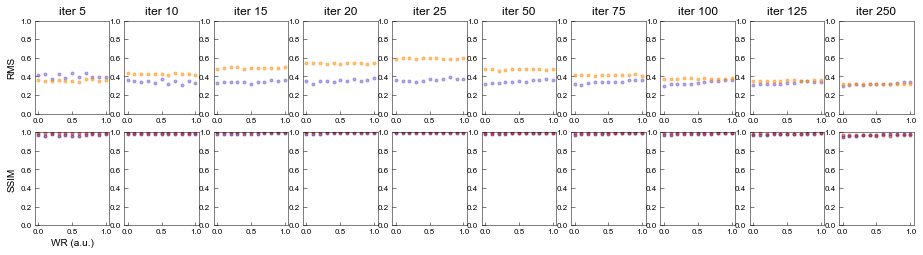



----------------------------------------------------------------
./data/RISK_NSL_theight_n_8_vset_0.npz
('spnoise', 0.5)
----------------------------------------------------------------

Truth NSL_theight | idx_prevar: 0 


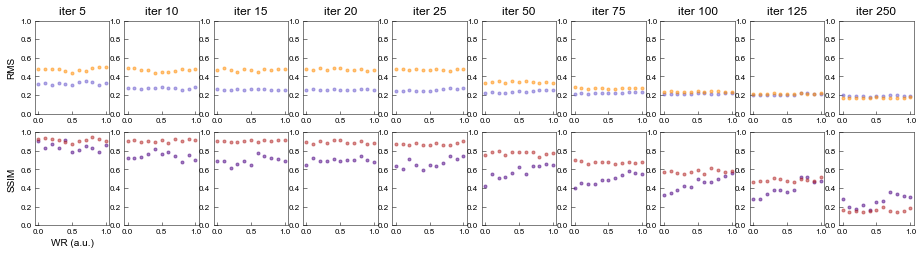

Truth NSL_theight | idx_prevar: 1 


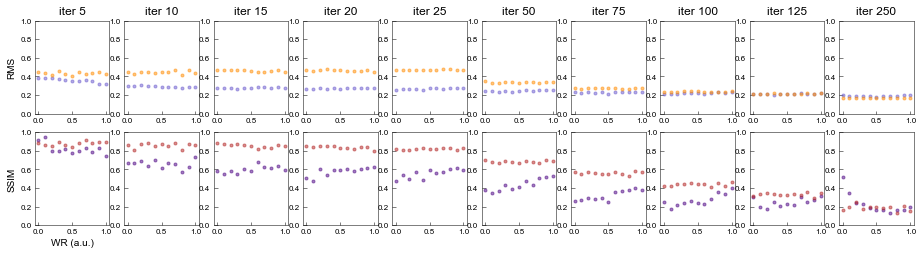

Truth NSL_theight | idx_prevar: 2 


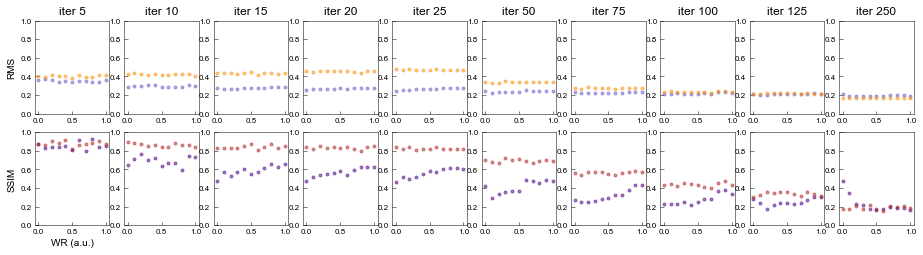

Truth NSL_theight | idx_prevar: 3 


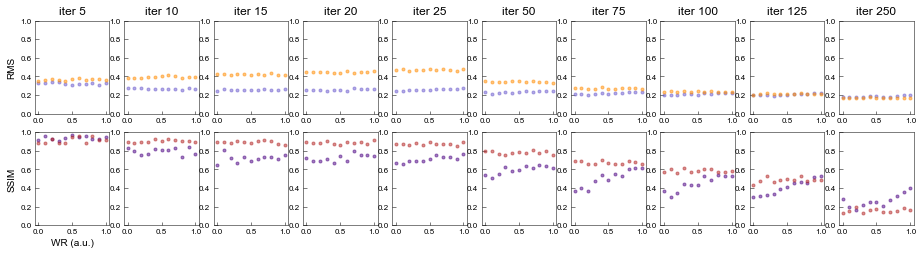

Truth NSL_theight | idx_prevar: 4 


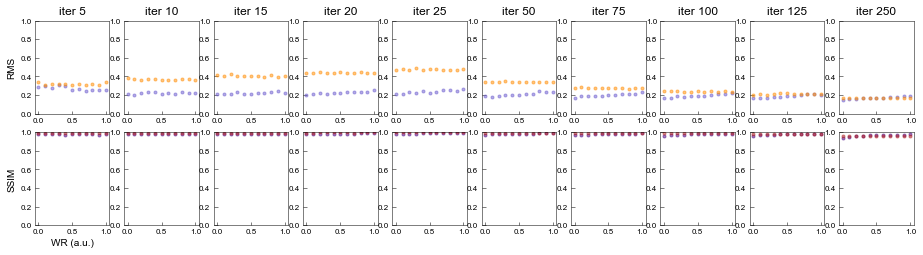

In [26]:
counter = 0 
truthname = 'NSL_tfloor'
noisevarlist = meta_noisevar_scan*2

for filename in weightratioslist:
    
    print '----------------------------------------------------------------'
    print filename
    print noisevarlist[counter]
    print '----------------------------------------------------------------'
    print 
    
    if counter > 8:
        truthname = 'NSL_theight'
    
    full_data_matrix = np.load(filename)["full_data_matrix"]
    plot_variable_v_iter(ParamUpdater, full_data_matrix, truthname=truthname)
    
    print
    print
    
    counter+=1
    

## Forgetting Factors as a function of noise

For a constant floor ratio


/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


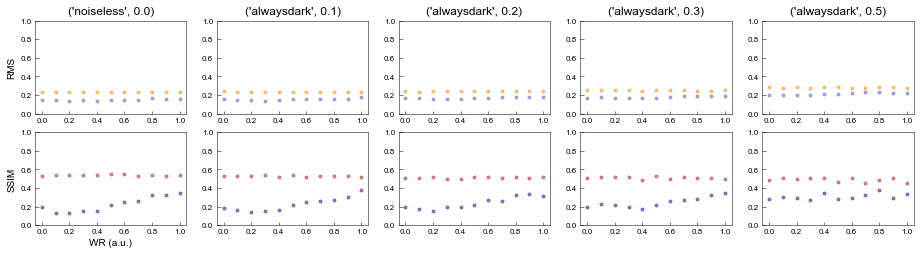

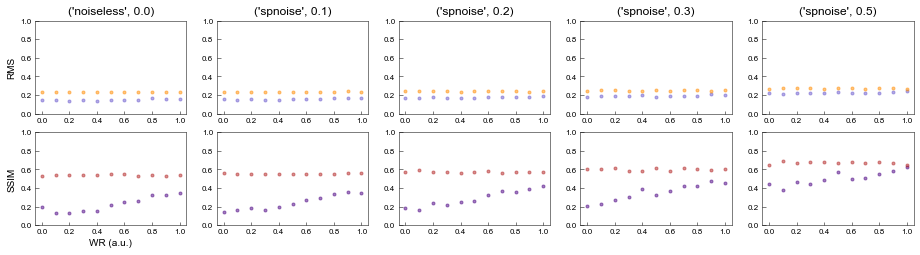

For a constant height ratio


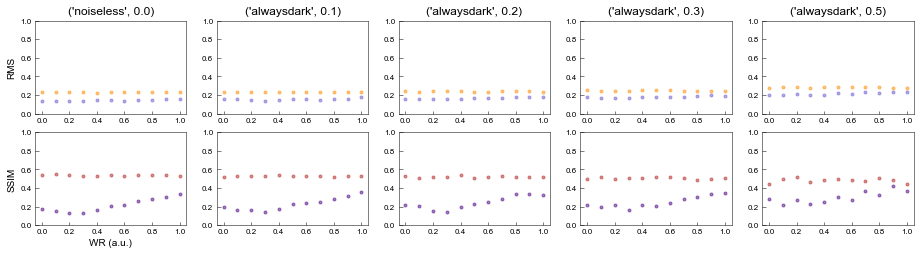

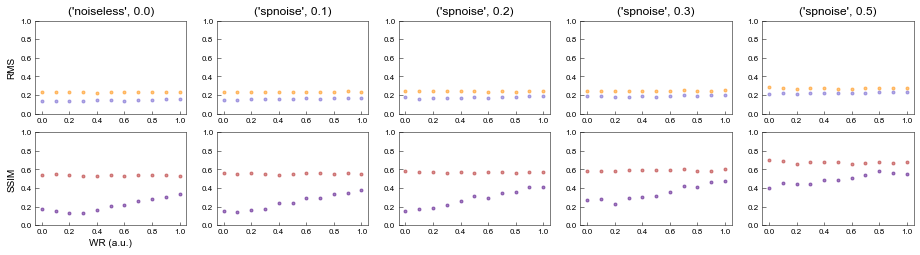

In [8]:
print "For a constant floor ratio"

plot_variable_v_noise(ParamUpdater, weightratioslist[0:9], [0] + range(1,9,2),
                      set_idx_msmt=6, set_idx_prevar=0,
                      truthname='', variablename='WR')


plot_variable_v_noise(ParamUpdater, weightratioslist[0:9], [0] + range(2,9,2),
                      set_idx_msmt=6, set_idx_prevar=0,
                      truthname='', variablename='WR')


print "For a constant height ratio"

plot_variable_v_noise(ParamUpdater, weightratioslist[9:], [0] + range(1,9,2),
                      set_idx_msmt=6, set_idx_prevar=0,
                      truthname='', variablename='WR')

plot_variable_v_noise(ParamUpdater, weightratioslist[9:], [0] + range(2,9,2),
                      set_idx_msmt=6, set_idx_prevar=0,
                      truthname='', variablename='WR')

## Linearised measurement model as a function of noise

For a constant floor ratio


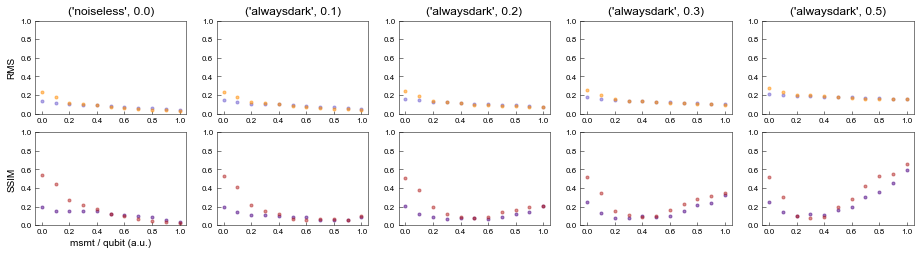

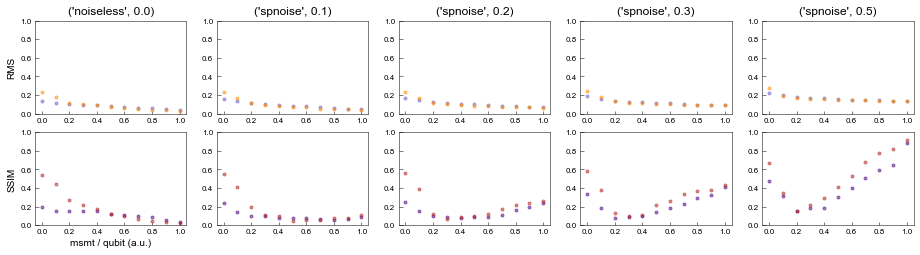

For a constant height ratio


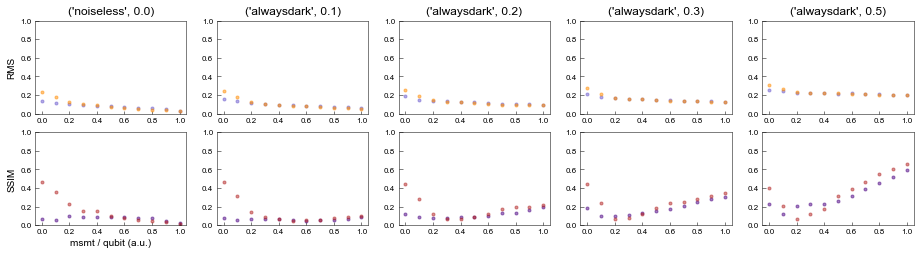

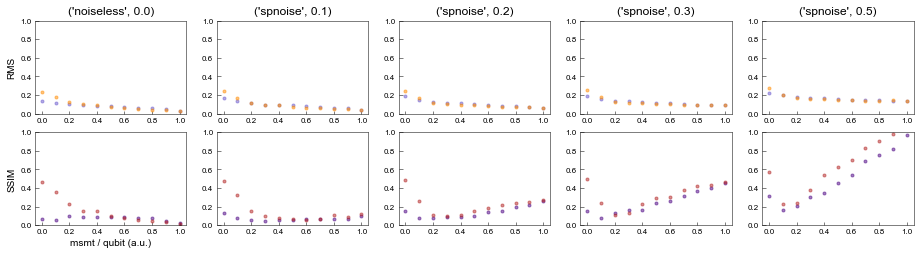

In [60]:
print "For a constant floor ratio"

plot_variable_v_noise(ParamUpdater, msmtperqubitlist[0:9], [0] + range(1,9,2),
                      set_idx_msmt=6, set_idx_prevar=0,
                      truthname='', variablename='msmt / qubit')


plot_variable_v_noise(ParamUpdater, msmtperqubitlist[0:9], [0] + range(2,9,2),
                      set_idx_msmt=6, set_idx_prevar=0,
                      truthname='', variablename='msmt / qubit')


print "For a constant height ratio"

plot_variable_v_noise(ParamUpdater, msmtperqubitlist[9:], [0] + range(1,9,2),
                      set_idx_msmt=6, set_idx_prevar=1,
                      truthname='', variablename='msmt / qubit')


plot_variable_v_noise(ParamUpdater, msmtperqubitlist[9:], [0] + range(2,9,2),
                      set_idx_msmt=6, set_idx_prevar=1,
                      truthname='', variablename='msmt / qubit')